#Proyek Analisis Data: Air Quality

- Nama: Yosephine Paulina Sianipar
- ID Bangkit: m004b4kx4547

## Menentukan Pertanyaan Bisnis

- Bagaimana penyebaran PM 2.5 pada setiap musim?
- Bagaimana penyebaran PM10 pada setiap musim?

## Import semua Packages/Library yang digunakan

In [ ]:
#import packages yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [ ]:
# Gathering Data
df_Aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
df_Dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
df_Dongsi = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
df_Guanyuan = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')
df_Gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')
df_Huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')
df_Nongzhanguan = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_Shunyi = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv')
df_Tiantan = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')
df_Wanliu = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv')
df_Wanshouxigong = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [ ]:
# concat
df = pd.concat([df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi, df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan, df_Shunyi, df_Tiantan, df_Wanliu, df_Wanshouxigong])

### Assessing Data

In [ ]:
#Assessing Data
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

### Cleaning Data

In [ ]:
#cleaning data
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [ ]:
df= df.drop(columns= ['No'])

#### Create Missing values imputation Function

In [ ]:
def impute_missing_values(df, col):
    # Calculate mean values for each station and column
    mean_values = df.groupby('station')[col].mean().reset_index()

    # Create a dictionary to store mean values for each station
    station_means = dict(zip(mean_values['station'], mean_values[col]))

    # Split the DataFrame into missing and non-missing values
    missing_df = df[df[col].isna()]
    non_missing_df = df[df[col].notna()]

    # Impute missing values using the station means
    # Loop through each station with missing data
    for station in missing_df['station'].unique():
        # Get the mean value for the current station from station_means
        station_mean = station_means.get(station)
        # Impute missing values with the mean
        missing_df.loc[missing_df['station'] == station, col] = station_mean

    # Concatenate and reset index
    df = pd.concat([non_missing_df, missing_df]).reset_index(drop=True)

    return df

#### Missing Values Imputation

In [ ]:
df = impute_missing_values(df, 'PM2.5')
df = impute_missing_values(df, 'PM10')
df = impute_missing_values(df, 'SO2')
df = impute_missing_values(df, 'NO2')
df = impute_missing_values(df, 'CO')
df = impute_missing_values(df, 'O3')
df = impute_missing_values(df, 'TEMP')
df = impute_missing_values(df, 'PRES')
df = impute_missing_values(df, 'DEWP')
df = impute_missing_values(df, 'RAIN')
df = impute_missing_values(df, 'WSPM')

#### Missing Values Imputation wd

In [ ]:
#imputation wd
df.groupby(by='station')['wd'].agg(pd.Series.mode).reset_index()

station   wd
0    Aotizhongxin   NE
1       Changping  NNW
2        Dingling  NNW
3          Dongsi  ENE
4        Guanyuan   NE
5         Gucheng    N
6         Huairou   NW
7    Nongzhanguan  ENE
8          Shunyi  NNE
9         Tiantan  ENE
10         Wanliu   NE
11  Wanshouxigong   NE

In [ ]:
df_null = df[df['wd'].isna()]
df_not_null = df[df['wd'].notna()]

In [ ]:
data_impute = []

for i in df_null['station']:
    if i == 'Aotizhongxin':
        data_impute.append('NE')
    elif i == 'Changping':
        data_impute.append('NNW')
    elif i == 'Dingling':
        data_impute.append('NNW')
    elif i == 'Dongsi':
        data_impute.append('ENE')
    elif i == 'Guanyuan':
        data_impute.append('NE')
    elif i == 'Gucheng':
        data_impute.append('N')
    elif i == 'Huairou':
        data_impute.append('NW')
    elif i == 'Nongzhanguan':
        data_impute.append('ENE')
    elif i == 'Shunyi':
        data_impute.append('NNE')
    elif i == 'Tiantan':
        data_impute.append('ENE')
    elif i == 'Wanliu':
        data_impute.append('NE')
    elif i == 'Wanshouxigong':
        data_impute.append('NE')

df_null['wd'] = data_impute

In [ ]:
df = pd.concat([df_not_null, df_null]).reset_index(drop=True)

### Grouping Data Based on Year, Month, Day and Station

In [ ]:
#grouping data
df_grouping = df.groupby(by=['year', 'month','day','station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean().reset_index()

#### Make New Date Column and Drop Year, Month, Day Column


In [ ]:
# new date column
df_grouping['date'] =  pd.to_datetime(df_grouping[['year', 'month', 'day']])
df_grouping = df_grouping.drop(columns=['year', 'month','day'])


In [ ]:
from google.colab import files
df_grouping.to_csv('Data Air Quality.csv', index=False)
files.download('Data Air Quality.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Explanatory Data ANalysis (EDA)
#### Correlation Heat Map Plot

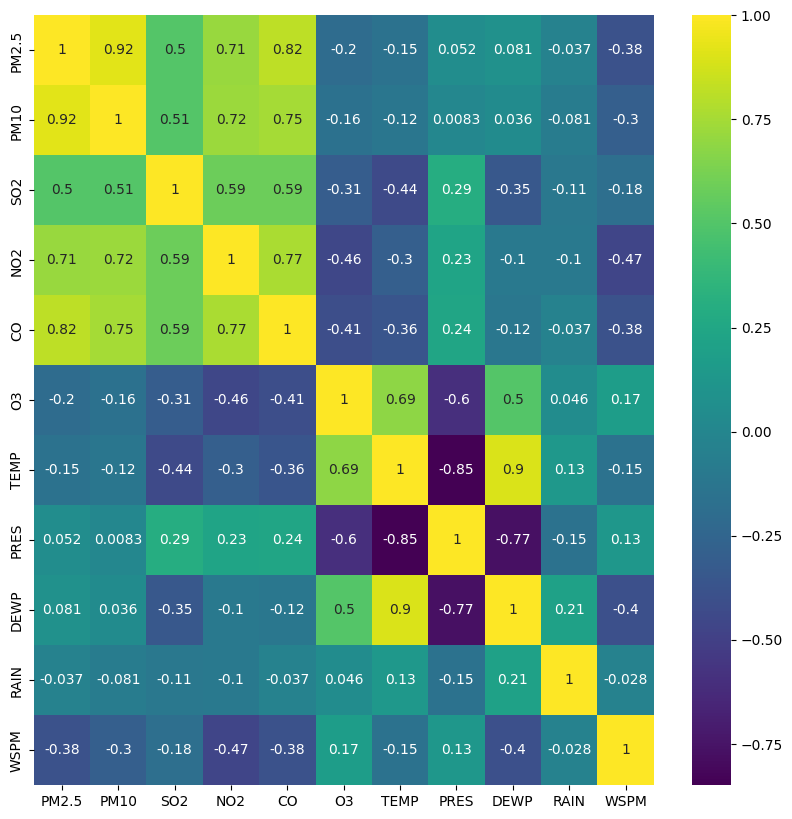

In [ ]:
#EDA
#Correlation Heat Map Plot

plt.figure(figsize=(10,10))
sns.heatmap(df_grouping.drop(columns=['station', 'date']).corr(), cmap='viridis', annot=True)
plt.show()


### Distribution Plot

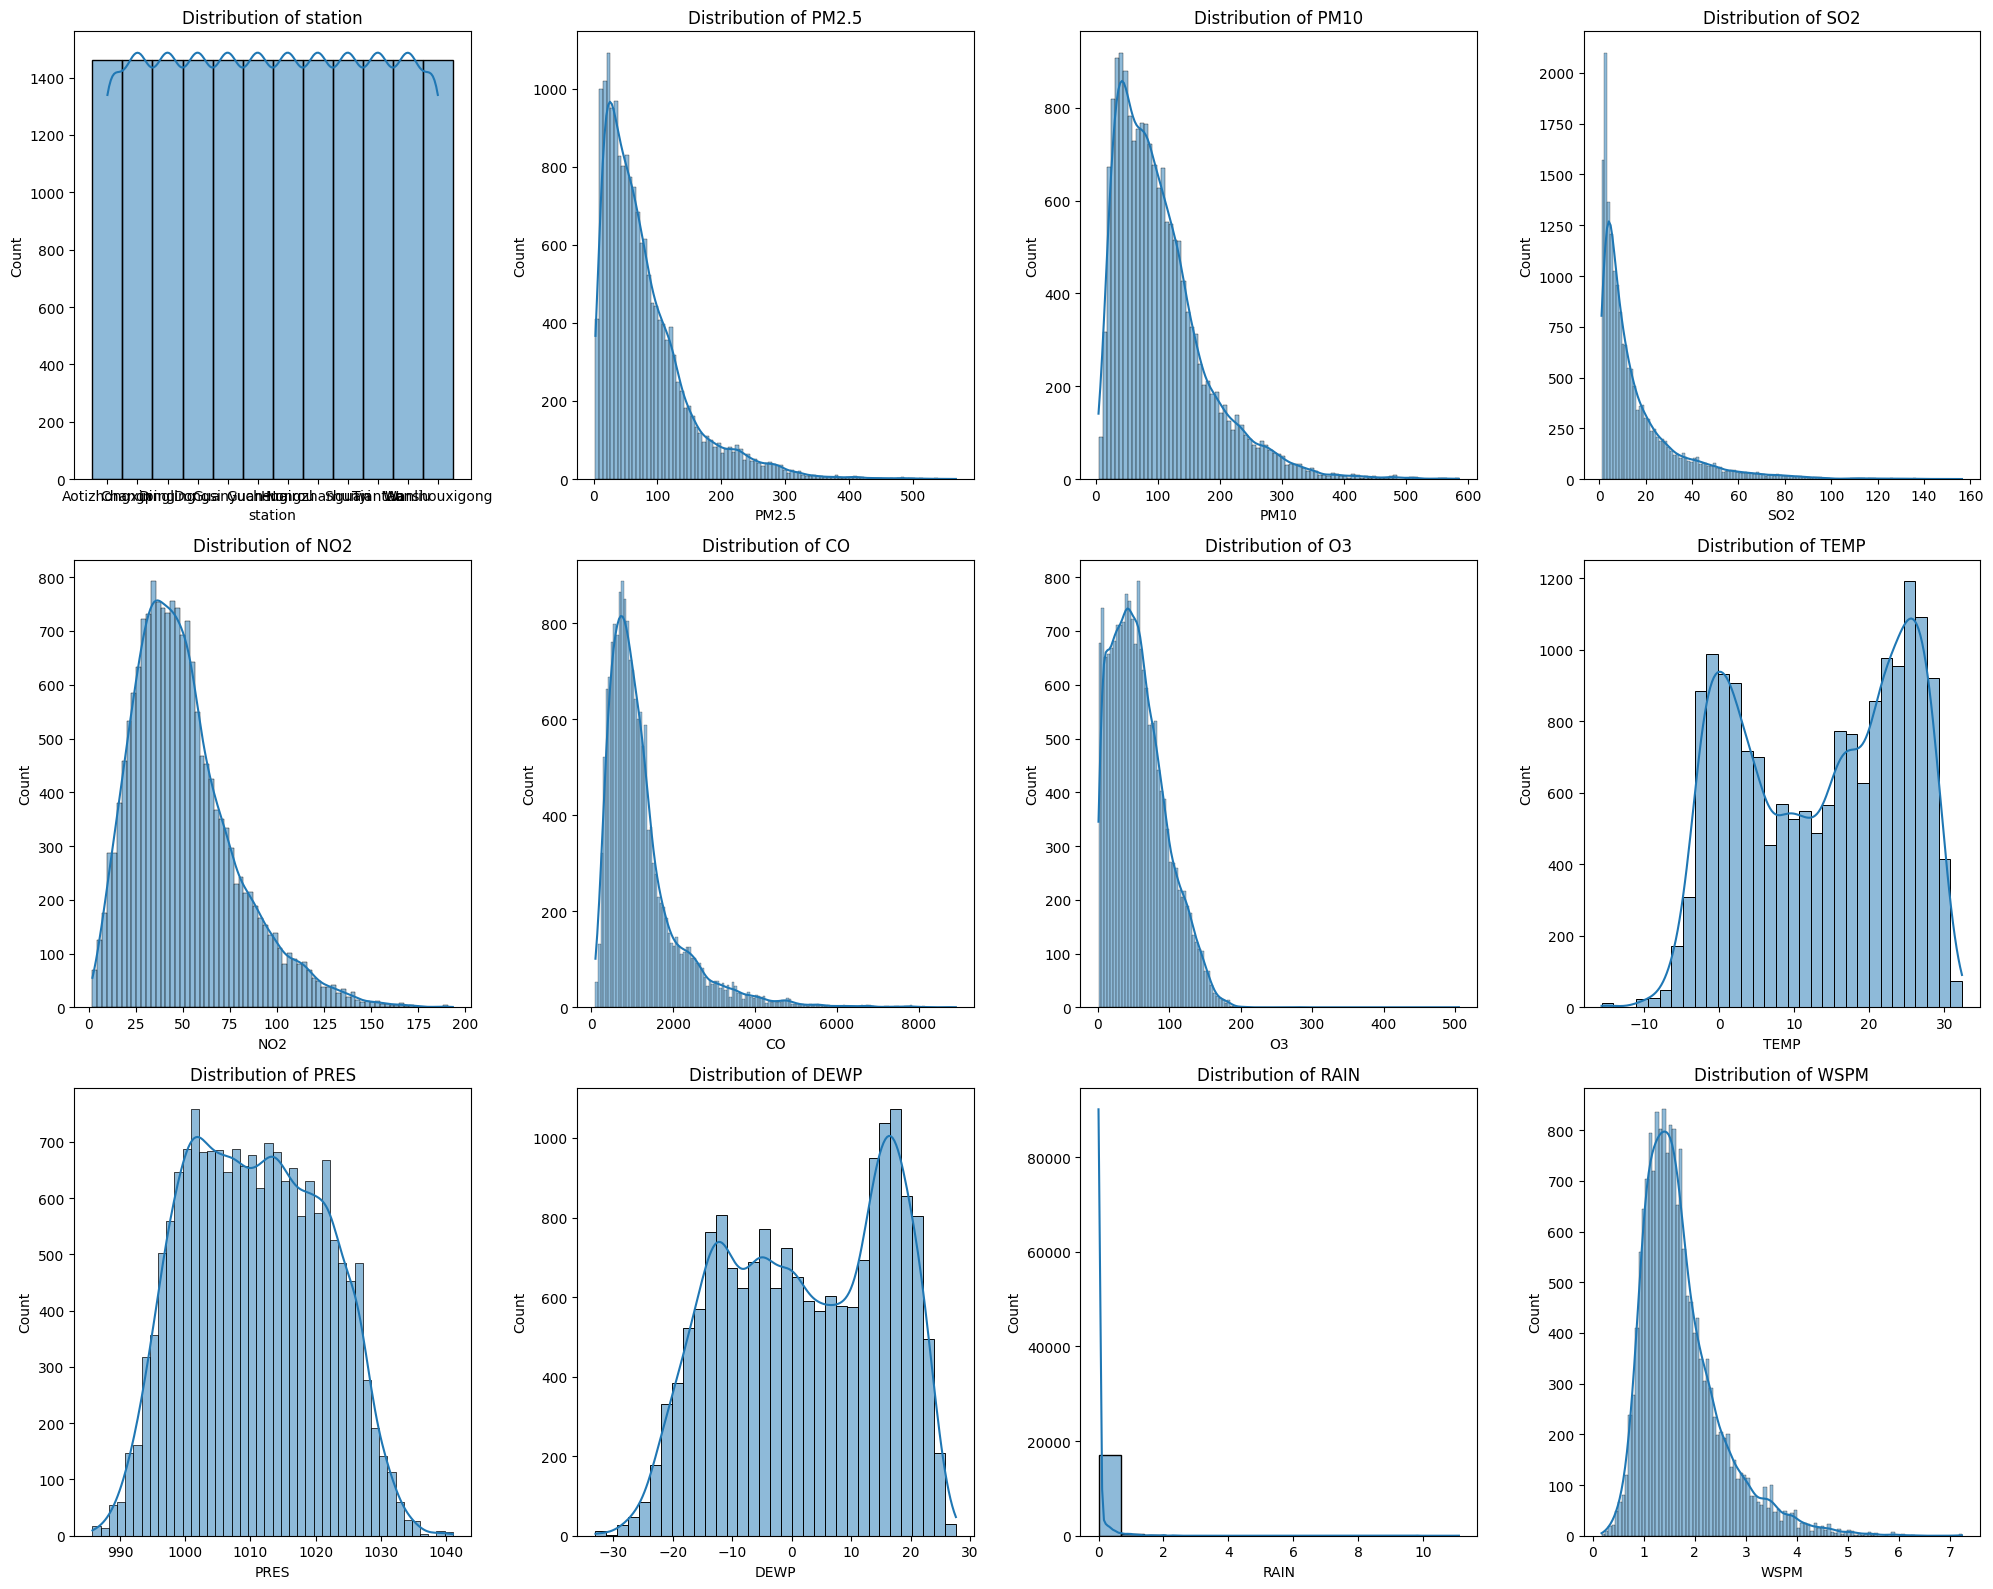

In [ ]:
fig, axes = plt.subplots(3,4, figsize=(20,16)) # Changed to 4x4 to accommodate all columns
row = 0
col = 0

for i in df_grouping.drop(columns=['date']):
    if col < 4:
        sns.histplot(data=df_grouping.drop(columns=['date']), x=i, kde=True, ax=axes[row][col])
        axes[row][col].set_title(f'Distribution of {i}')
        col+=1
    else:
        col = 0
        row+=1
        sns.histplot(data=df_grouping.drop(columns=['date']), x=i, kde=True, ax=axes[row][col])
        axes[row][col].set_title(f'Distribution of {i}')
        col+=1
plt.tight_layout()
plt.show()

### Box Plot

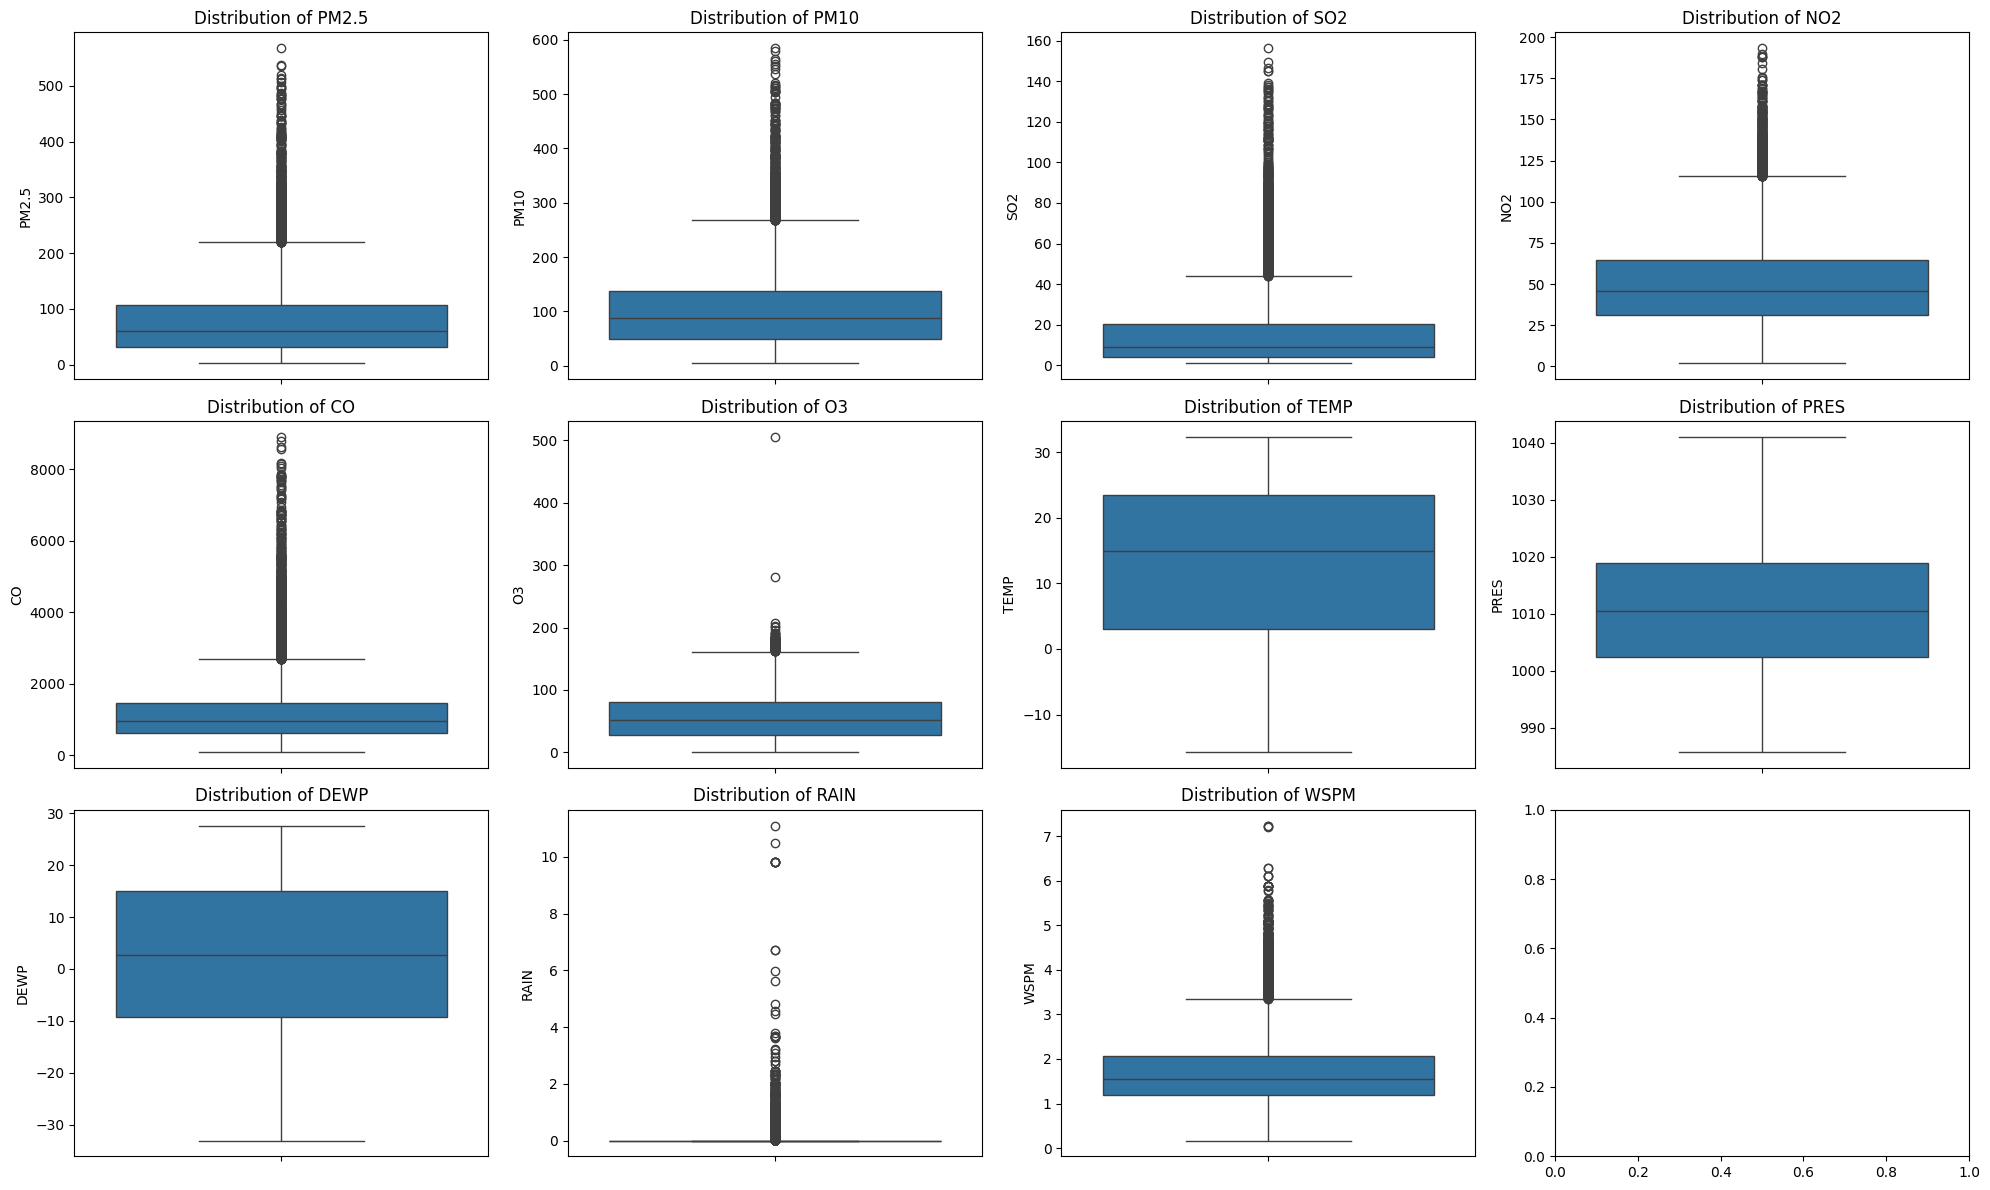

In [ ]:
#Box plot
fig, axes = plt.subplots(3,4, figsize=(20,12))
row = 0
col = 0

for i in df_grouping.drop(columns=['station', 'date']):
    if col < 4:
        sns.boxplot(data=df_grouping.drop(columns=['station', 'date']), y=i, ax=axes[row][col])
        axes[row][col].set_title(f'Distribution of {i}')
        col+=1
    else:
        col = 0
        row+=1
        sns.boxplot(data=df_grouping.drop(columns=['station', 'date']), y=i, ax=axes[row][col])
        axes[row][col].set_title(f'Distribution of {i}')
        col+=1
plt.tight_layout()
plt.show()

### Statistika Deskriptif

In [ ]:
#Statistika Deskriptif
df_grouping.drop(columns=['station', 'date']).describe()

PM2.5          PM10           SO2           NO2            CO  \
count  17532.000000  17532.000000  17532.000000  17532.000000  17532.000000   
mean      79.780235    104.578547     15.820683     50.583319   1230.625090   
std       67.971811     73.395166     17.970441     27.550291    941.699380   
min        3.000000      4.833333      1.000000      2.000000    100.000000   
25%       31.166667     49.791667      4.078118     30.958333    637.500000   
50%       61.349525     87.958333      9.169921     45.943872    975.000000   
75%      106.730389    136.843750     20.126423     64.725978   1458.333333   
max      567.416667    584.666667    156.416667    193.333333   8904.166667   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  17532.000000  17532.000000  17532.000000  17532.000000  17532.000000   
mean      57.349235     13.538931   1010.746341      2.490654      0.064475   
std       37.893758     10.819017     10.261098     13.523383      0.331493   
min        1.000000    -15.683333    985.787500    -33.020833      0.000000   
25%       27.261906      3.035417   1002.329167     -9.187500      0.000000   
50%       52.076817     15.012500   1010.518750      2.764583      0.000000   
75%       80.918861     23.475000   1018.905208     14.995833      0.000000   
max      505.383777     32.366667   1041.025000     27.616667     11.108333   

               WSPM  
count  17532.000000  
mean       1.729701  
std        0.779487  
min        0.170833  
25%        1.195833  
50%        1.558333  
75%        2.058333  
max        7.237500

### Time Series Analysis

In [ ]:
#Time Series Analysis
stations_group1 = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi']
stations_group2 = ['Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan']
stations_group3 = ['Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

df_Aotizhongxin_Changping_Dingling_Dongsi = df_grouping[df_grouping['station'].isin(stations_group1)]
df_Guanyuan_Gucheng_Huairou_Nongzhanguan = df_grouping[df_grouping['station'].isin(stations_group2)]
df_Shunyi_Tiantan_Wanliu_Wanshouxigong = df_grouping[df_grouping['station'].isin(stations_group3)]


In [ ]:
df_merge = {
    "Aotizhongxin_Changping_Dingling_Dongsi": df_Aotizhongxin_Changping_Dingling_Dongsi,
    "Guanyuan_Gucheng_Huairou_Nongzhanguan": df_Guanyuan_Gucheng_Huairou_Nongzhanguan,
    "Shunyi_Tiantan_Wanliu_Wanshouxigong": df_Shunyi_Tiantan_Wanliu_Wanshouxigong
}


In [ ]:
def create_line_plot(df, column, title):
    plt.figure(figsize=(25, 4))
    sns.lineplot(data=df, x='date', y=column, hue='station')
    plt.title(title)
    plt.show()


### Plot PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP ,RAIN, WSPM

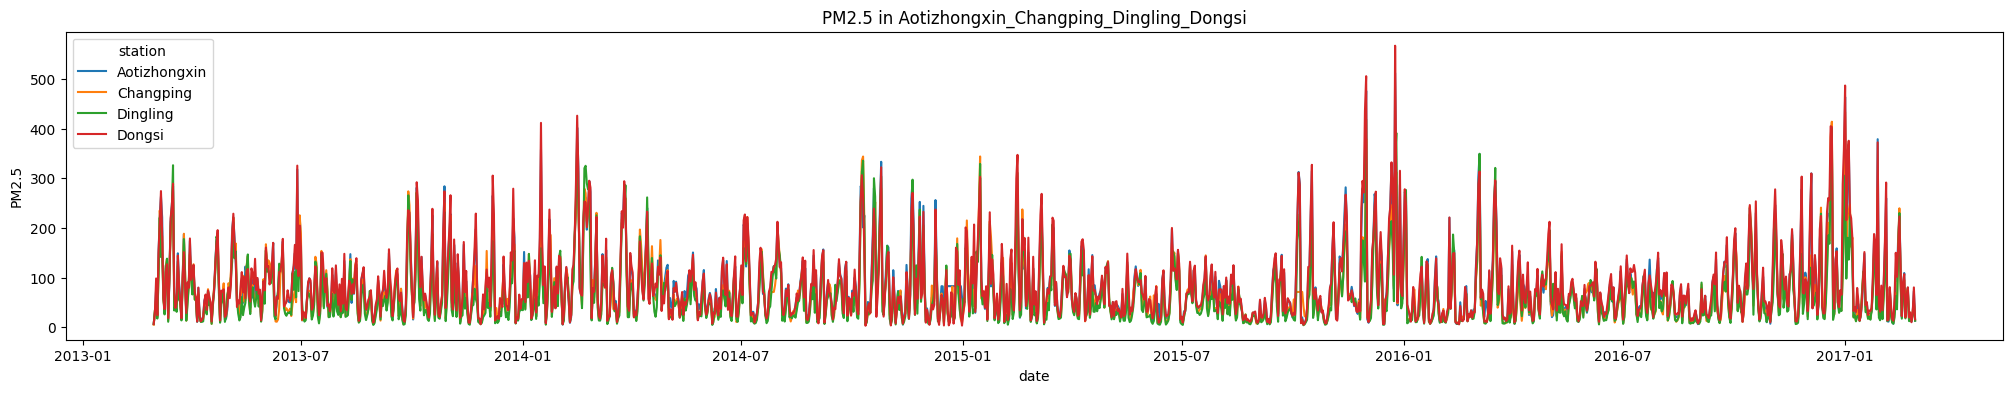

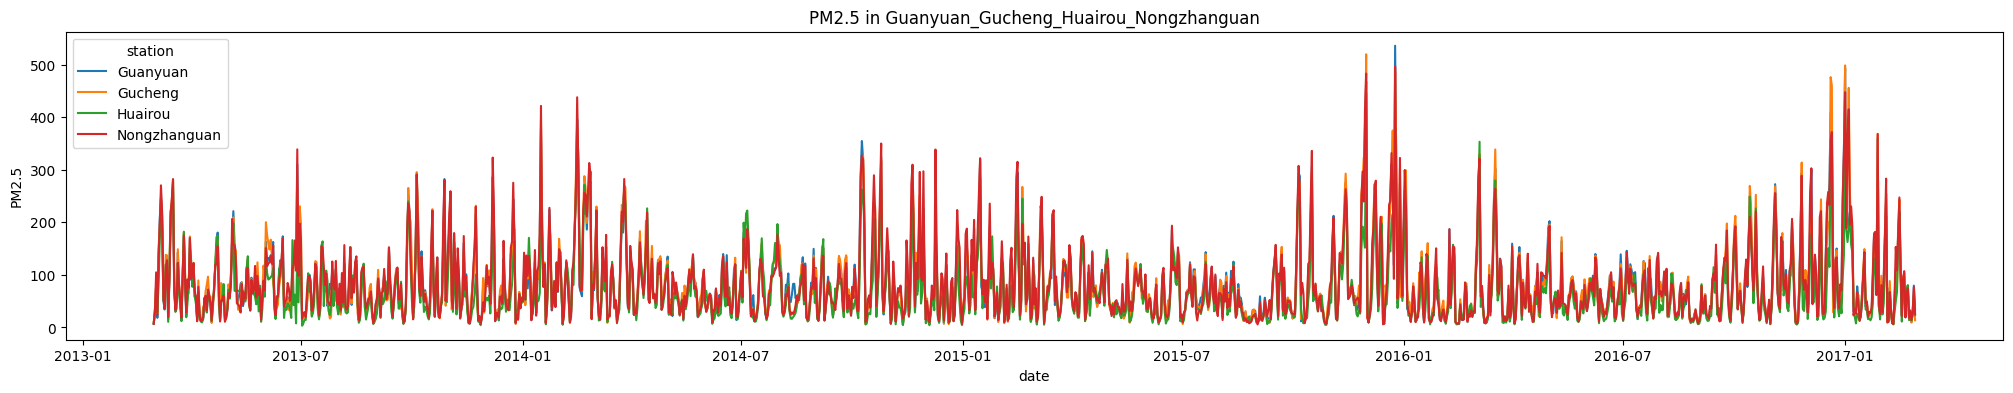

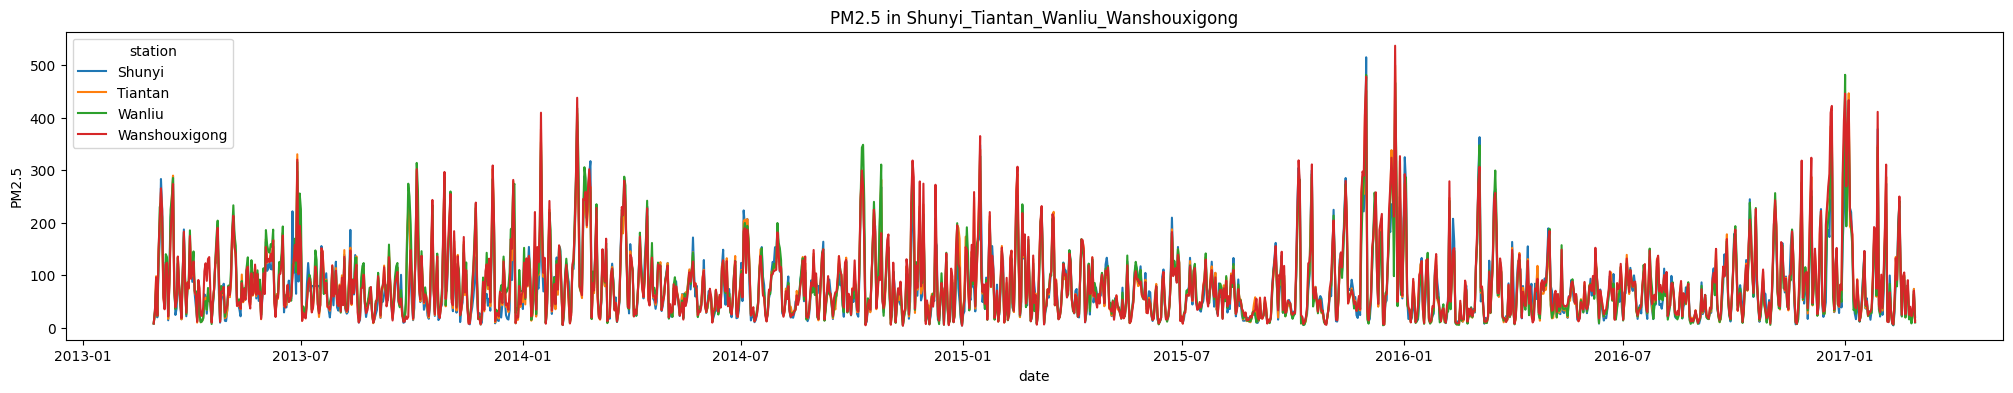

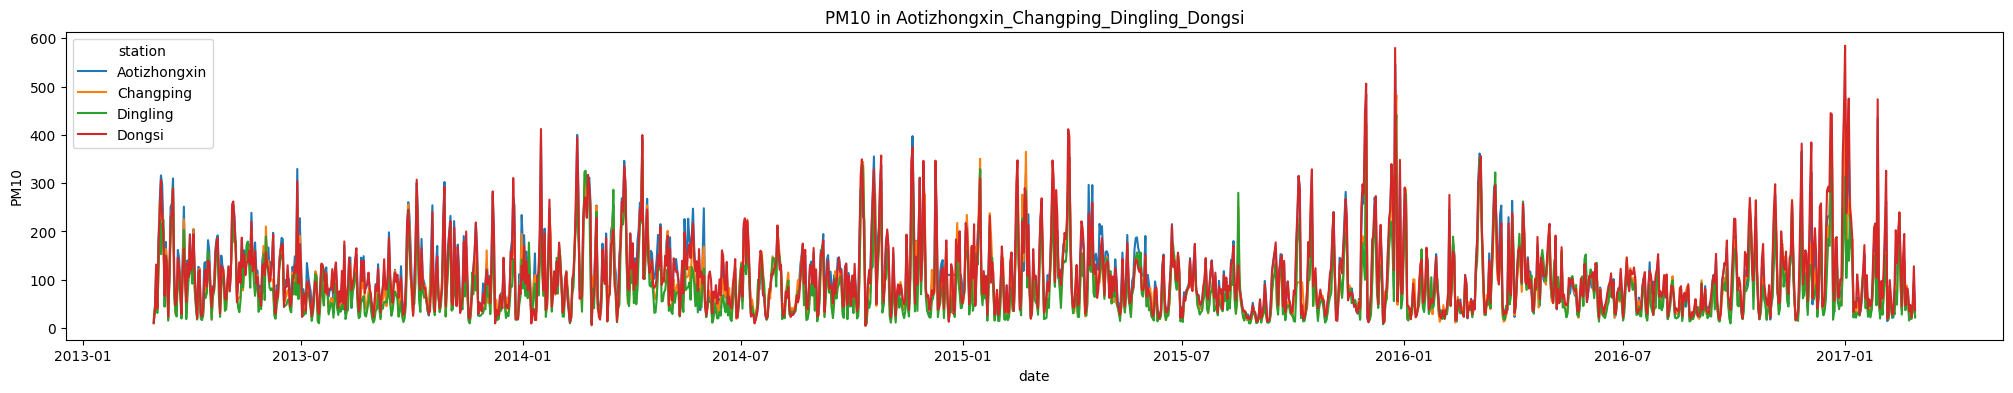

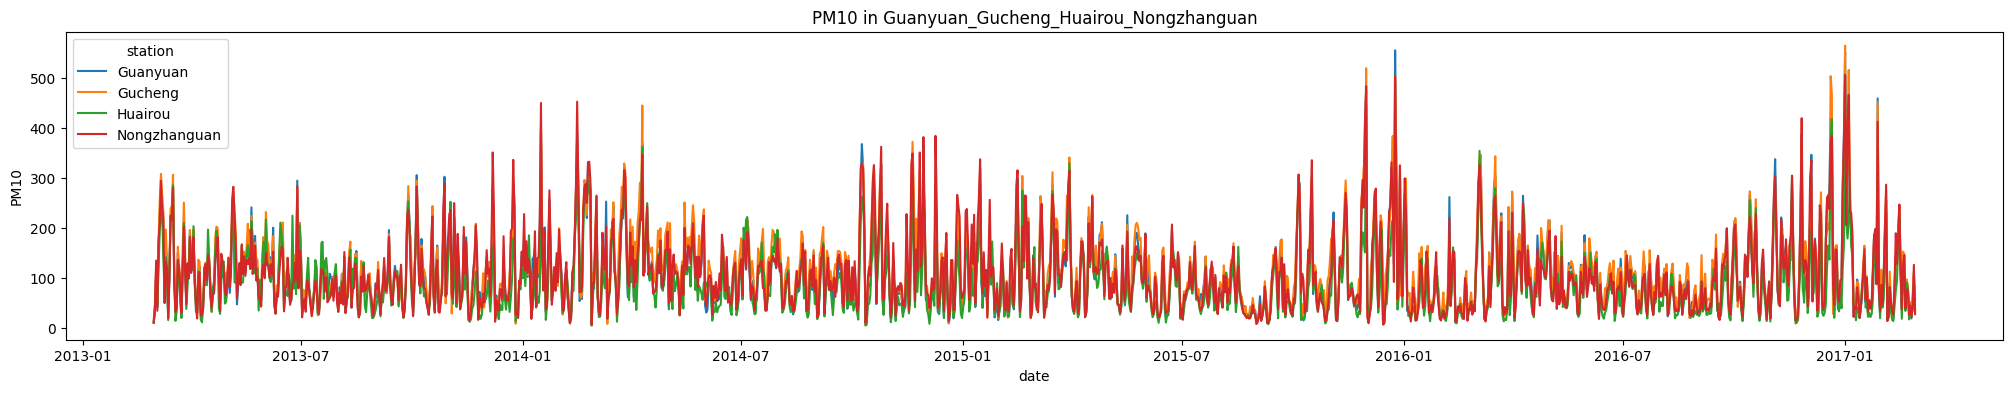

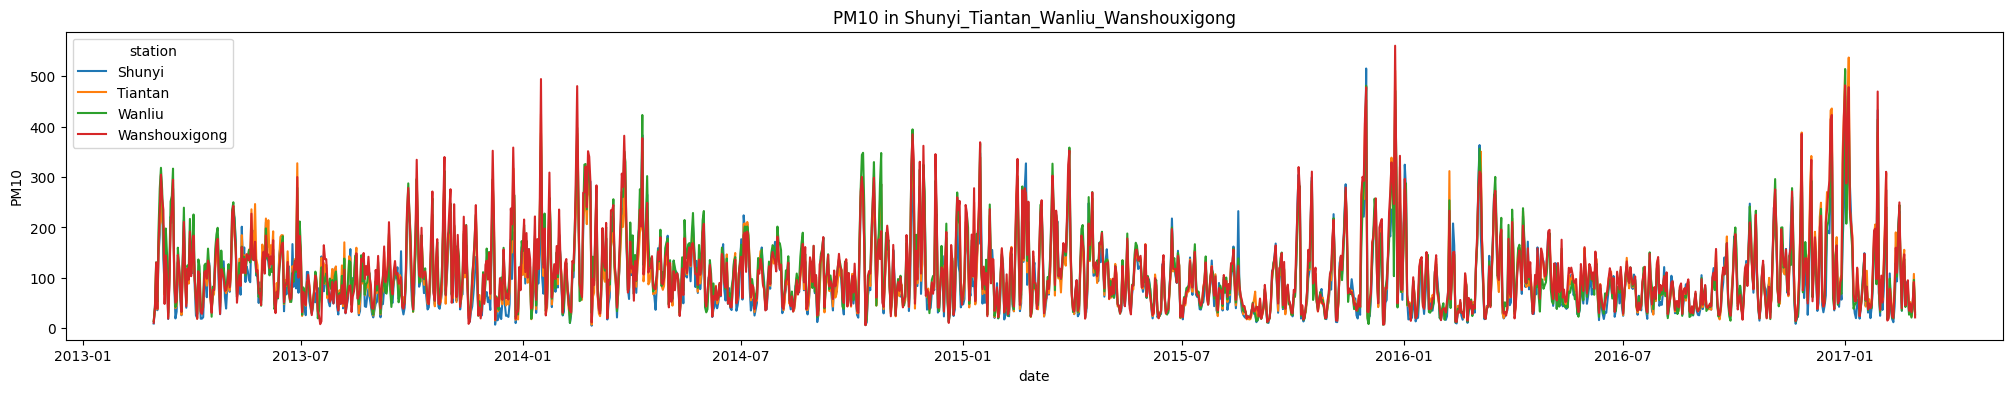

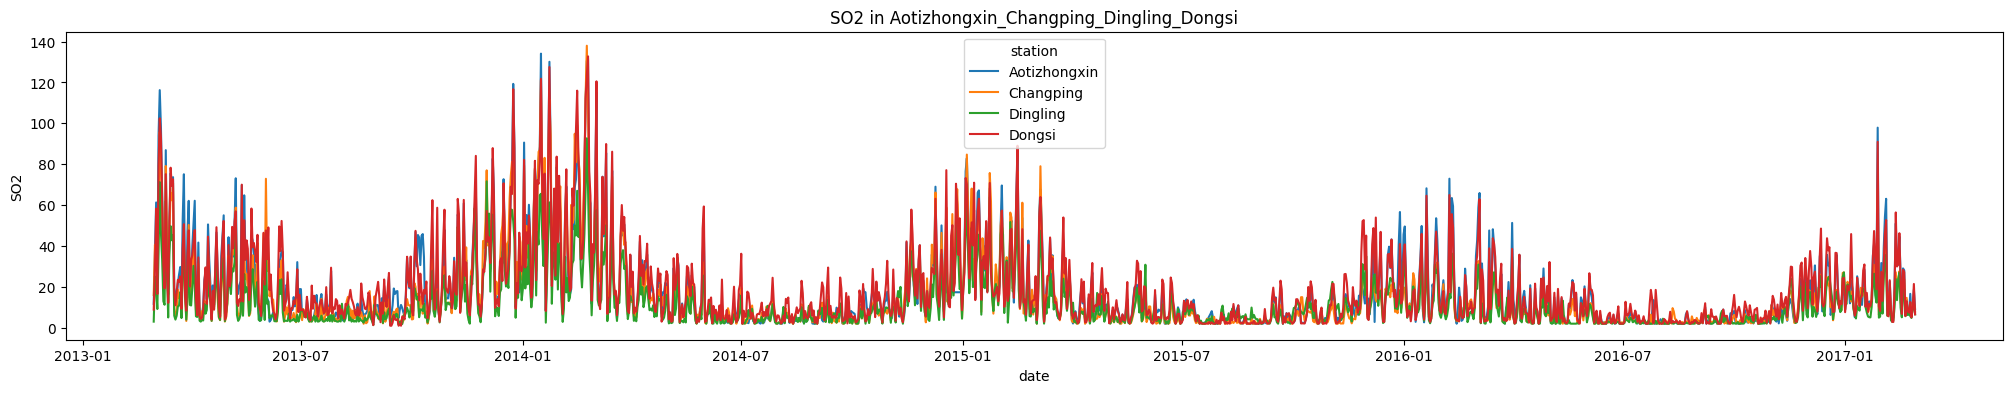

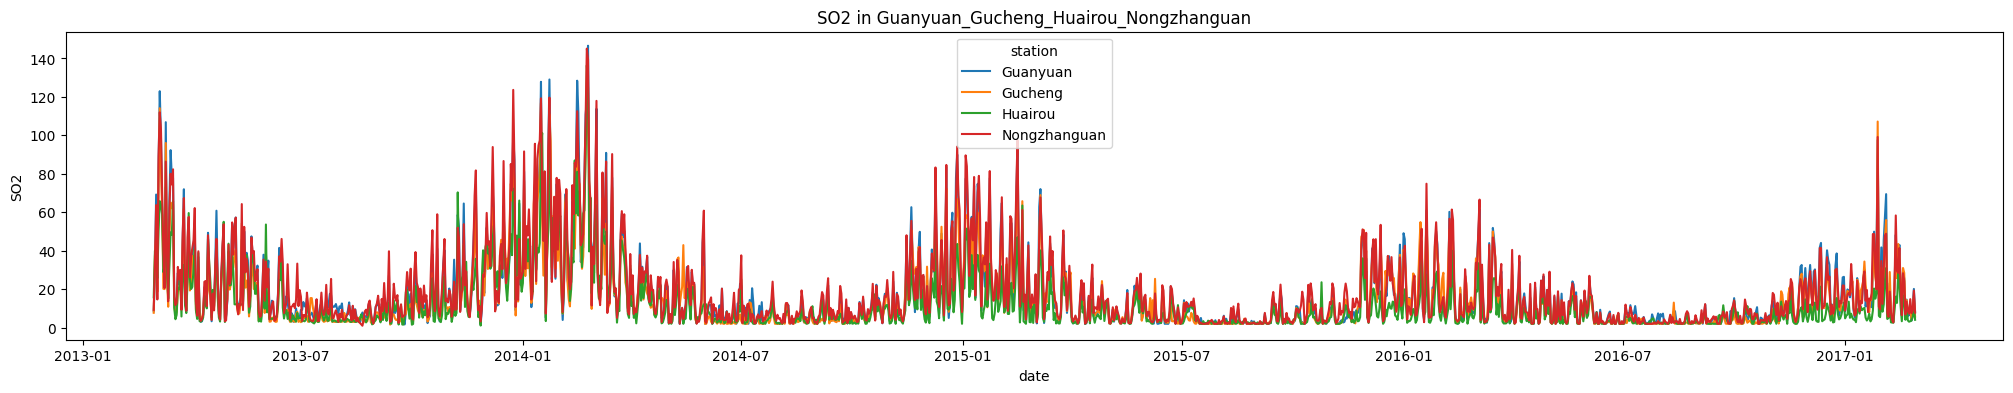

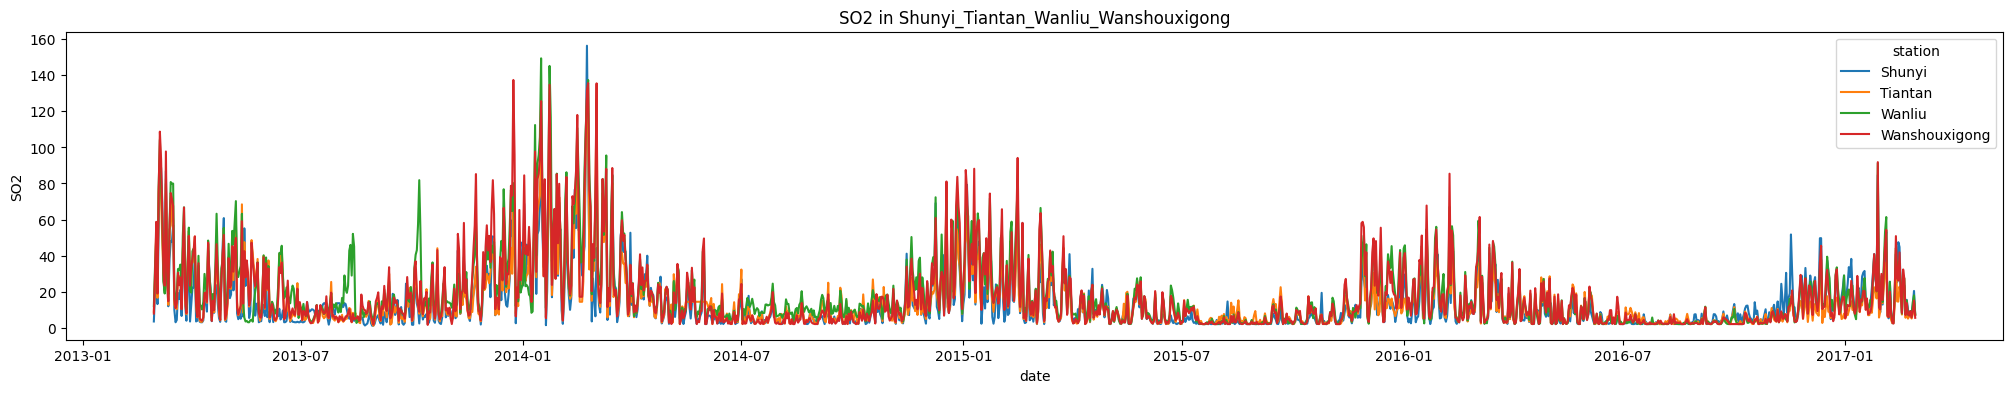

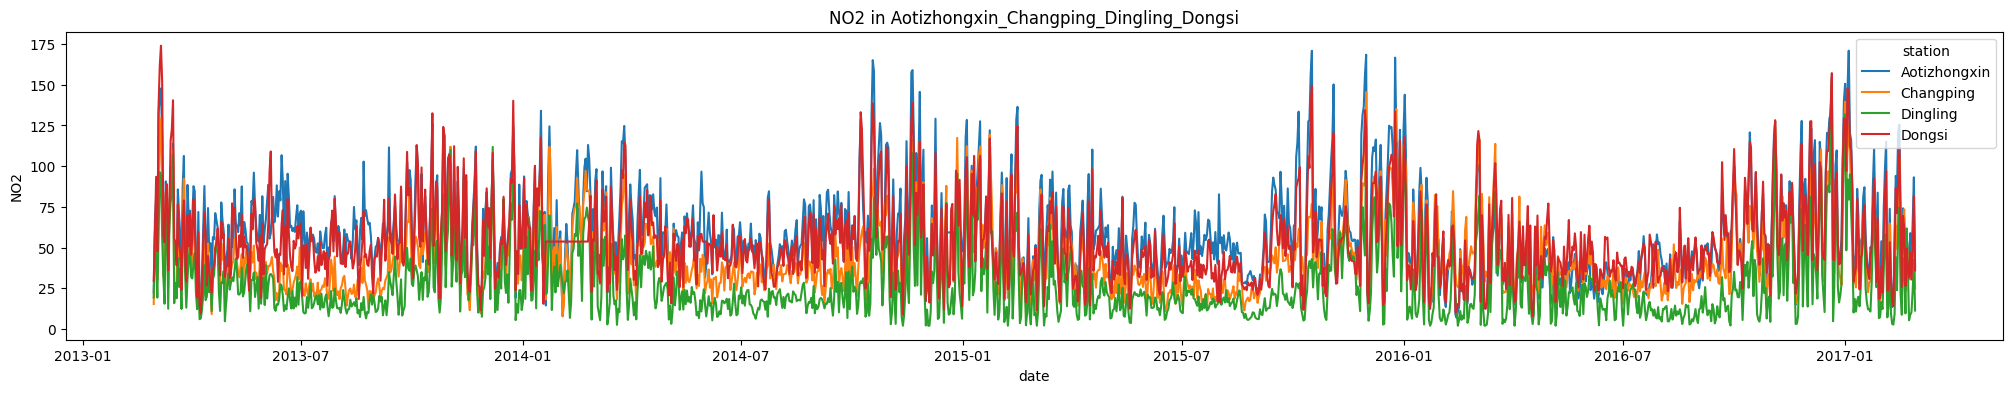

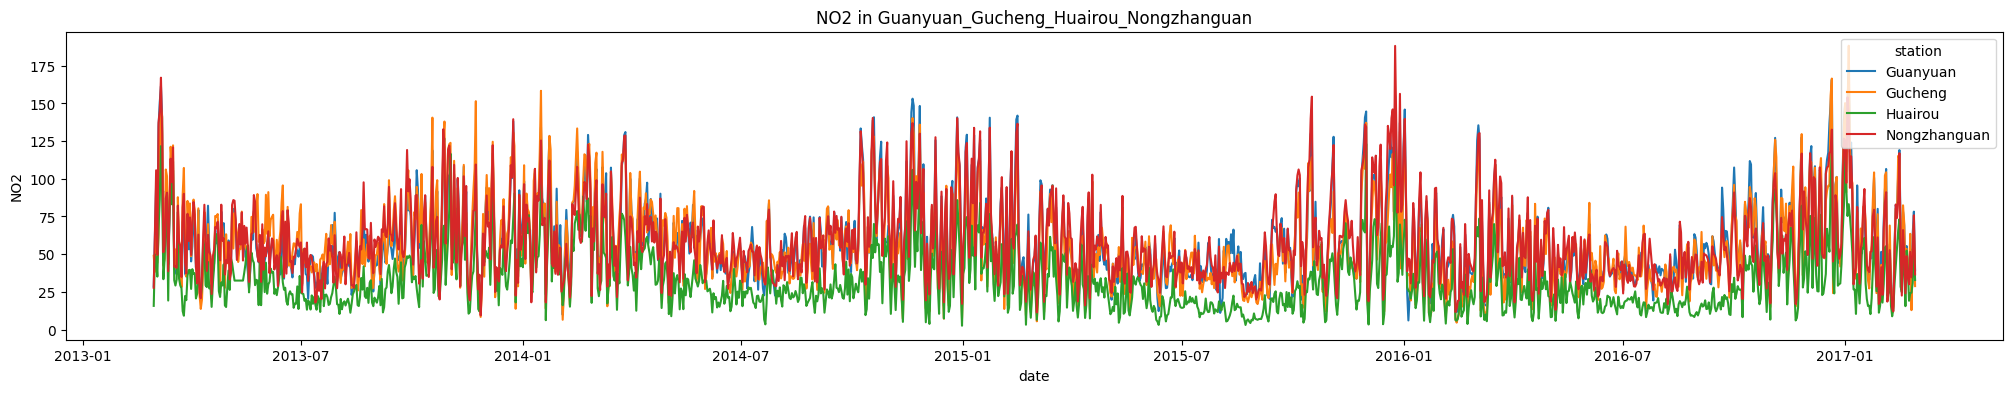

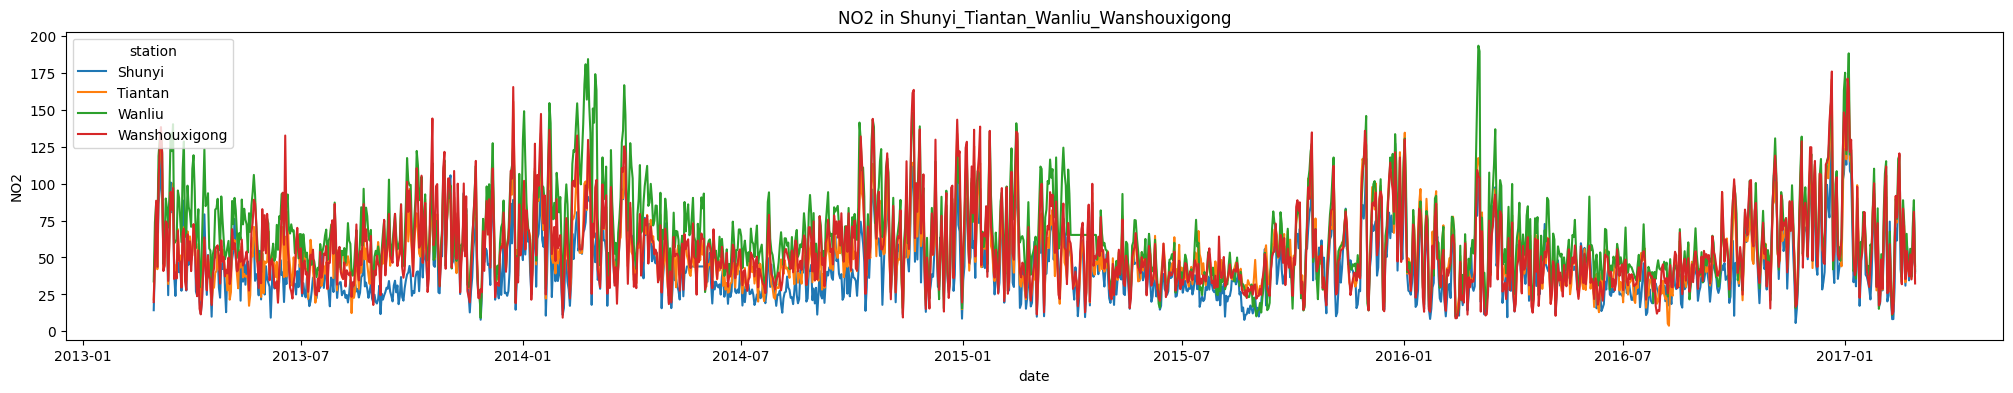

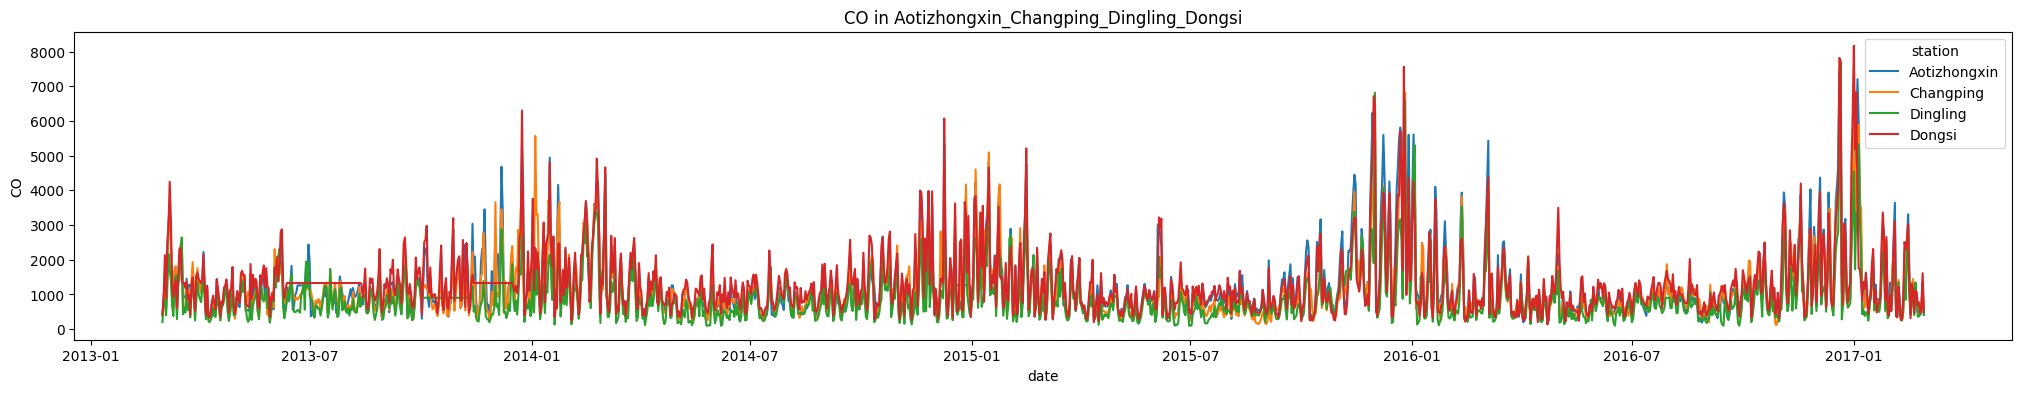

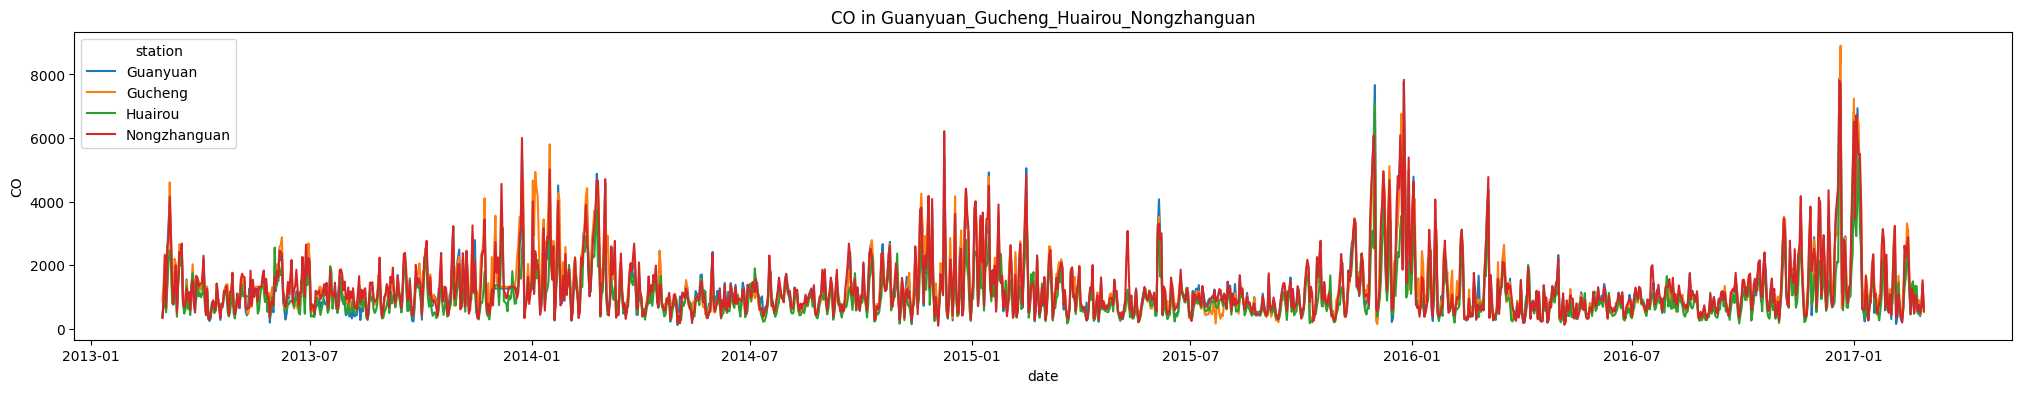

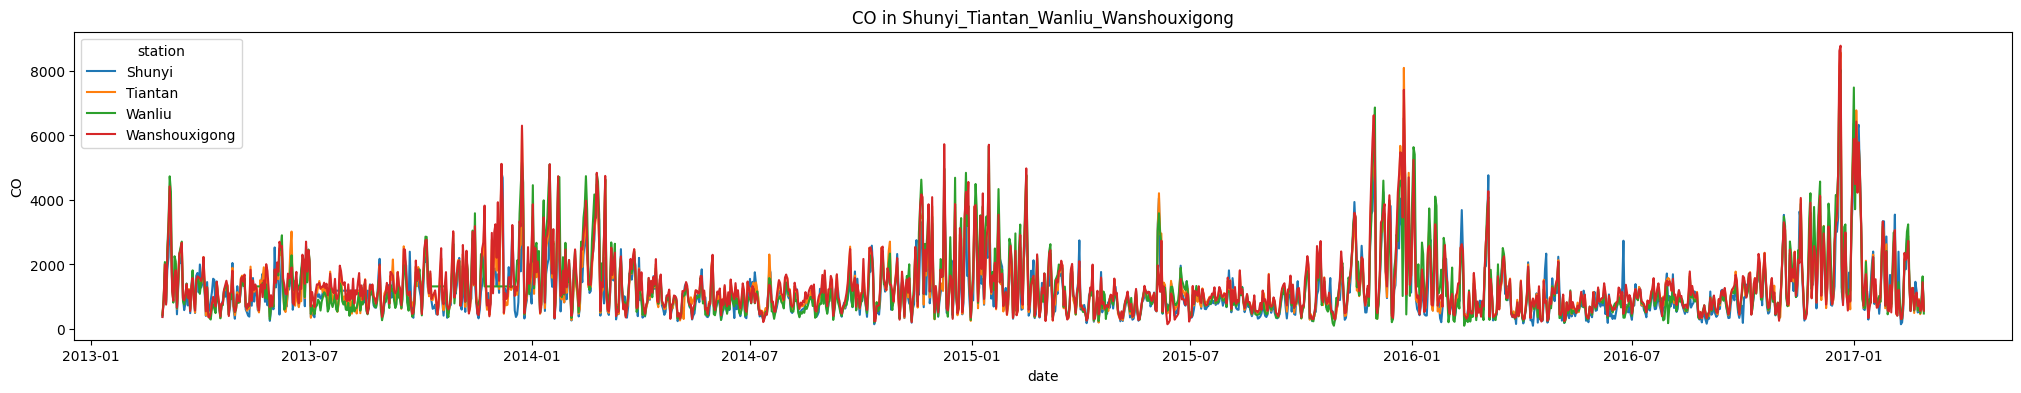

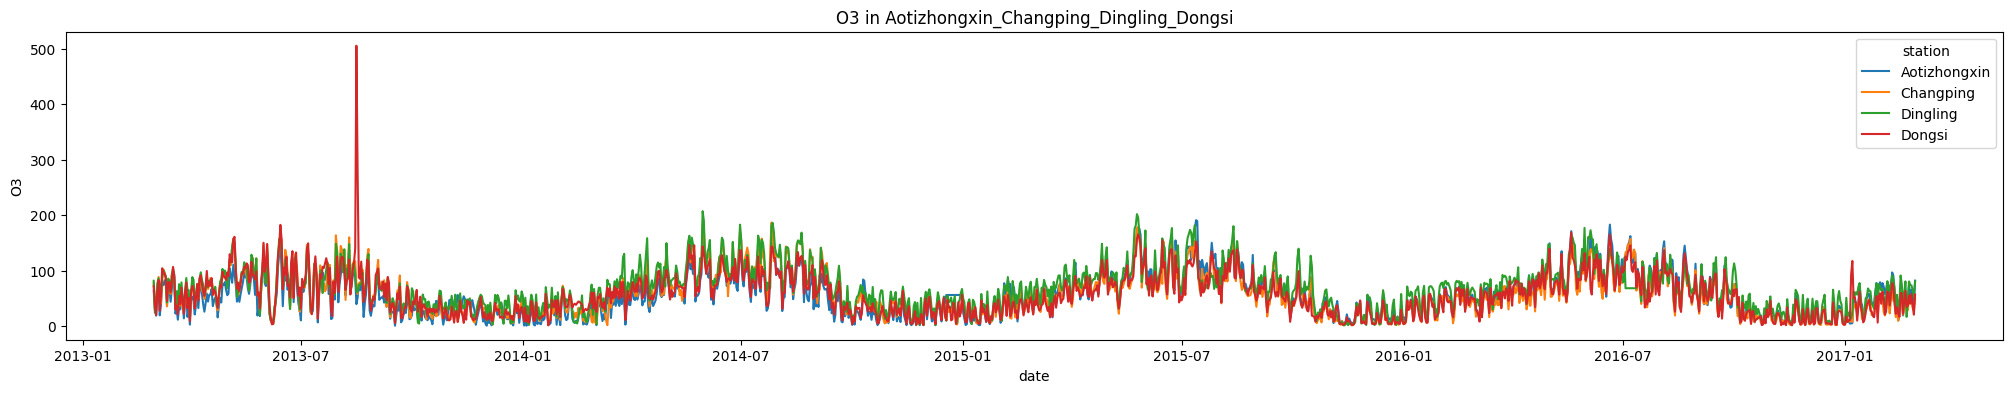

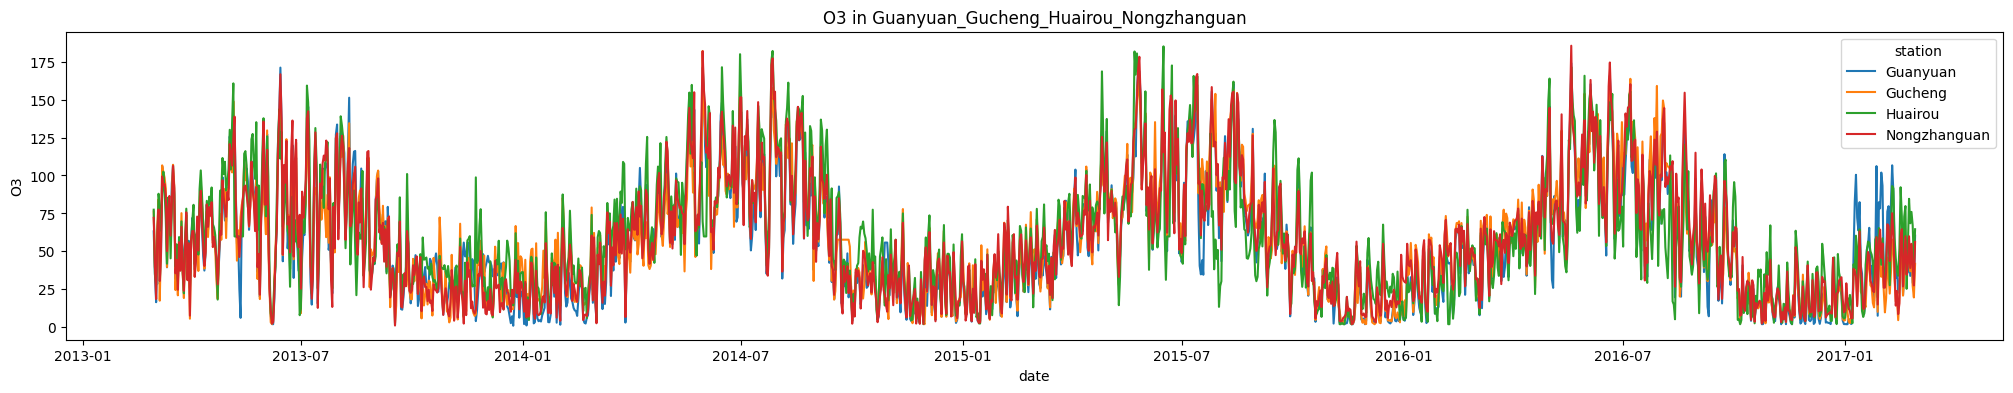

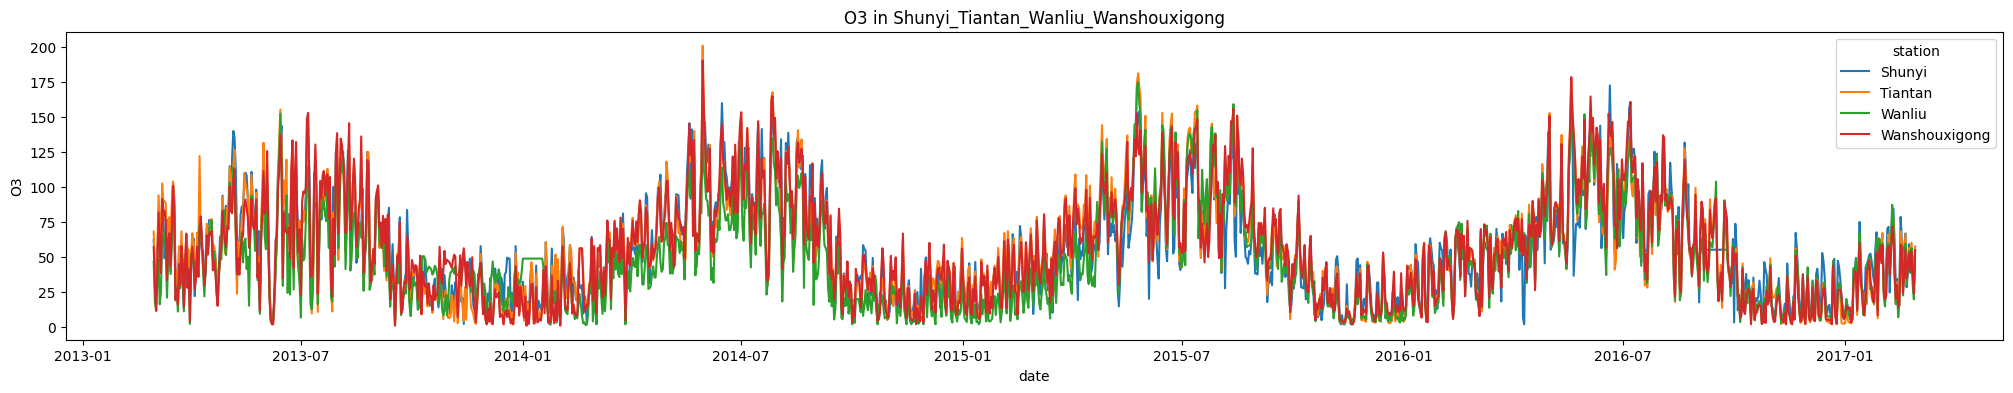

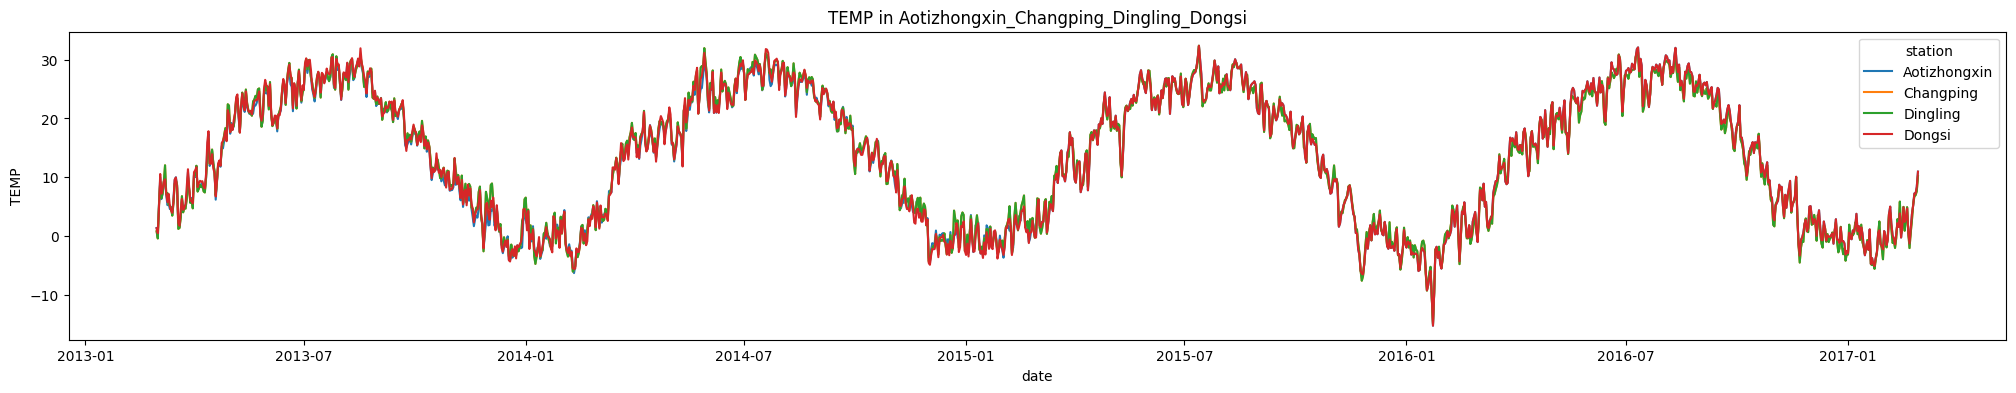

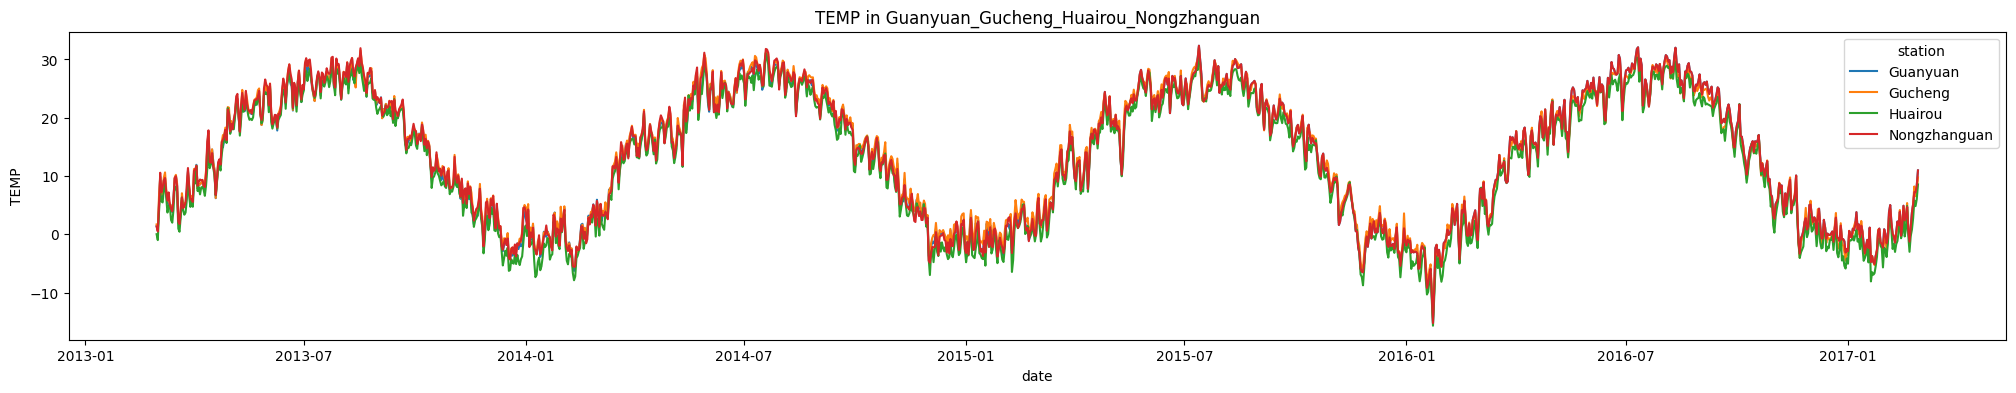

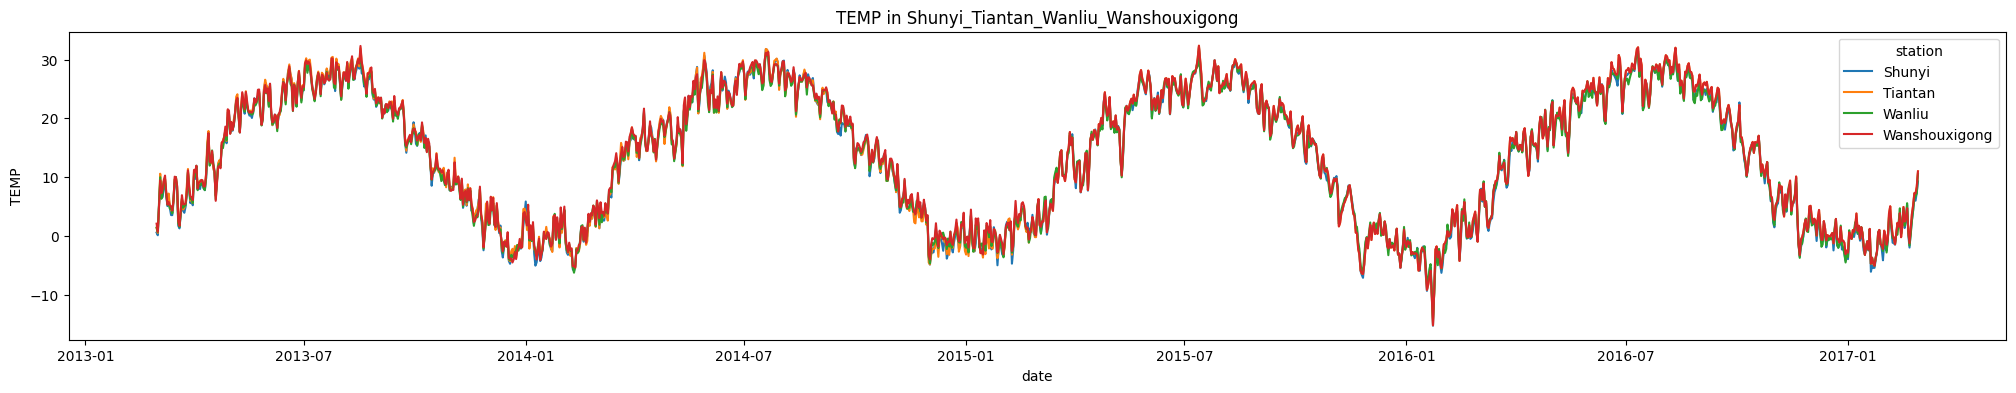

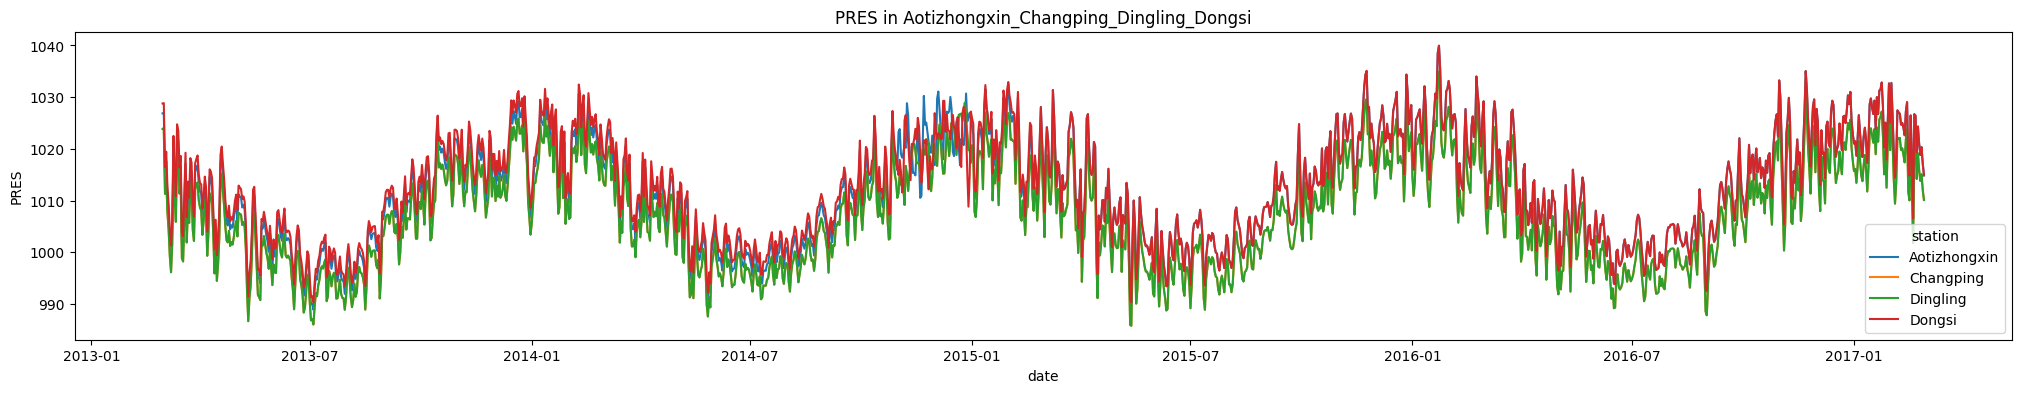

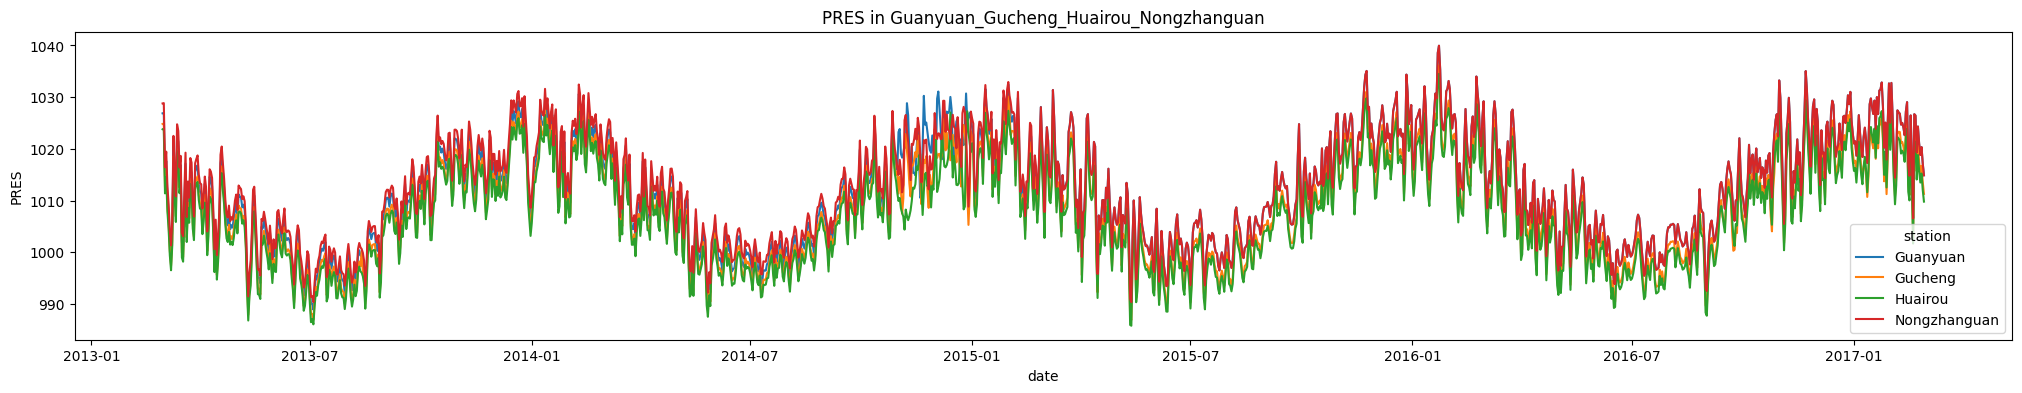

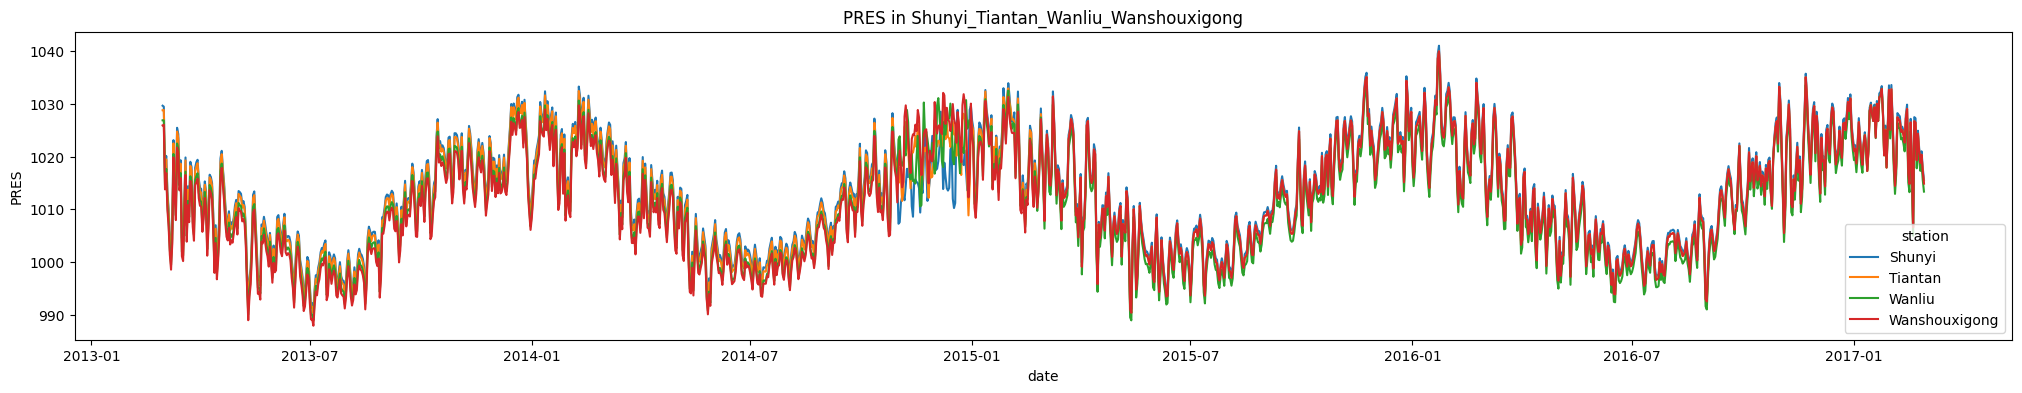

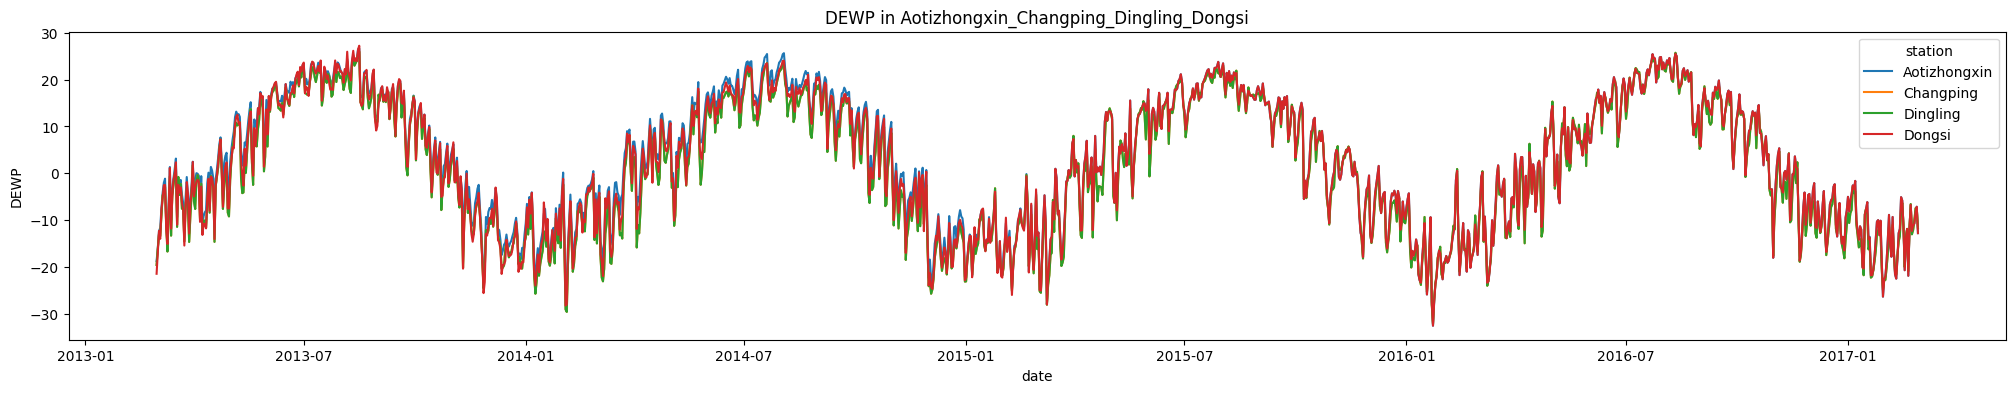

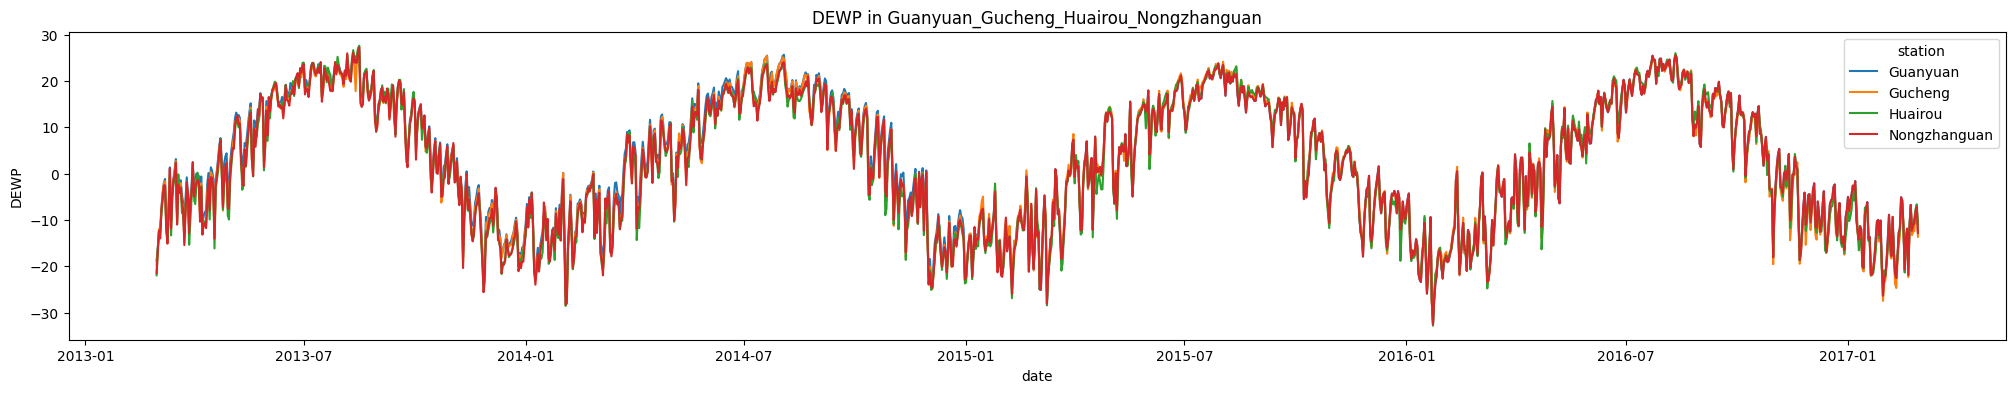

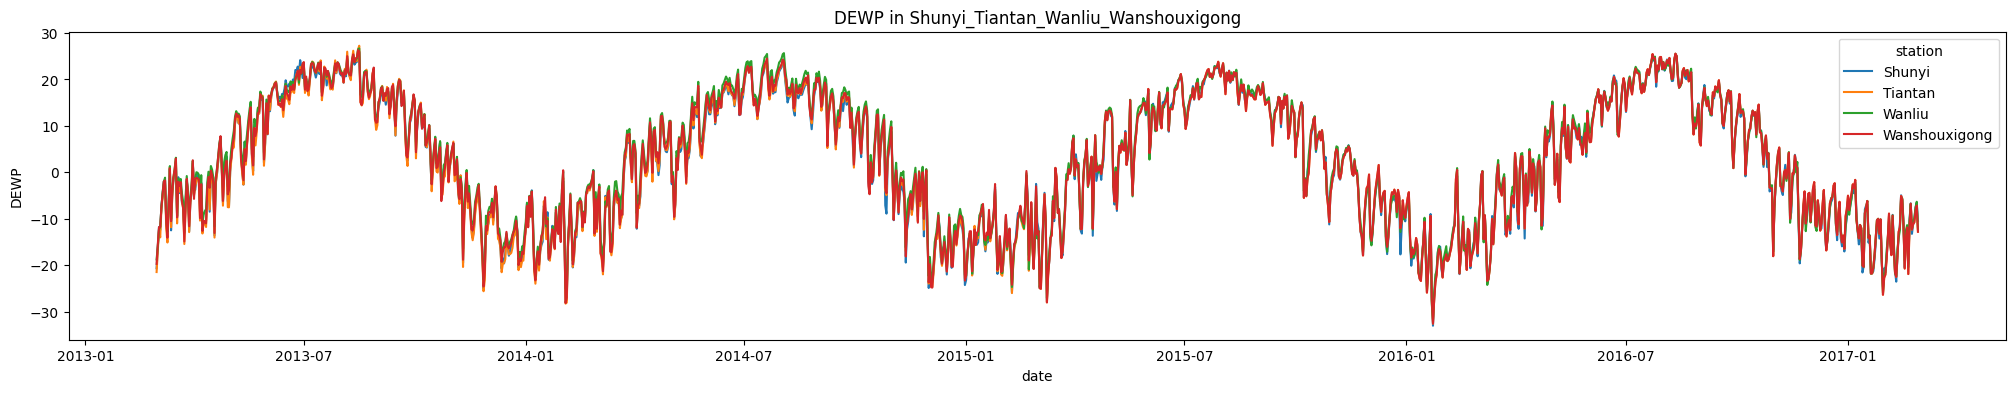

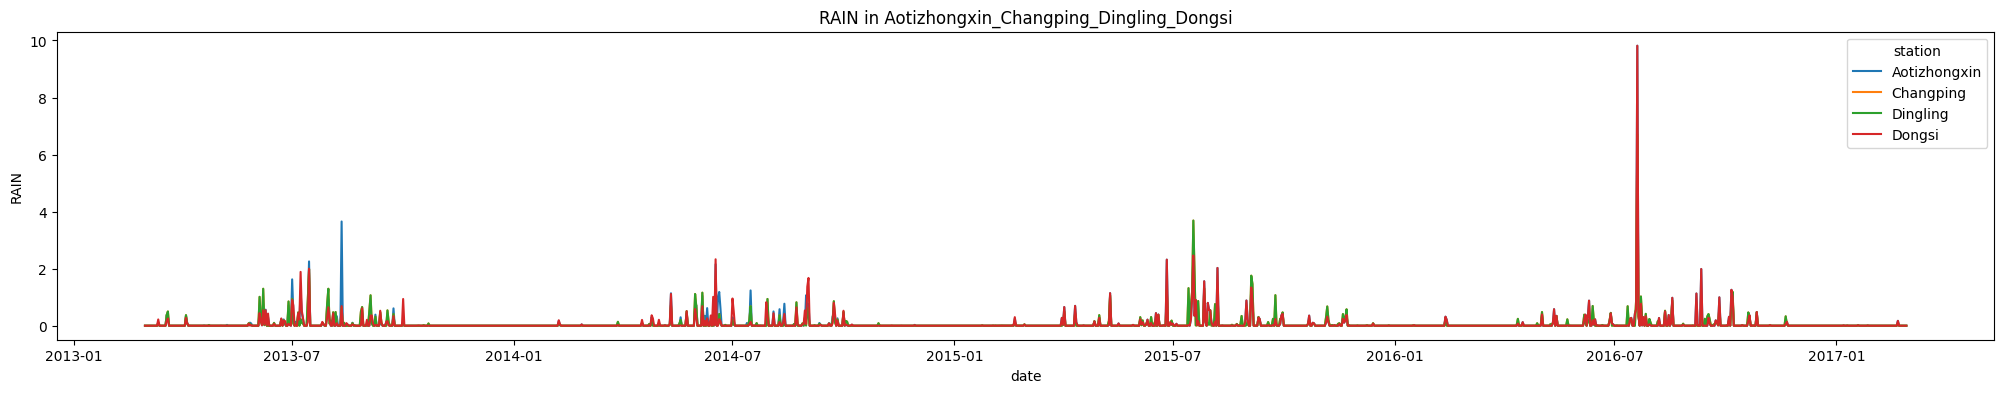

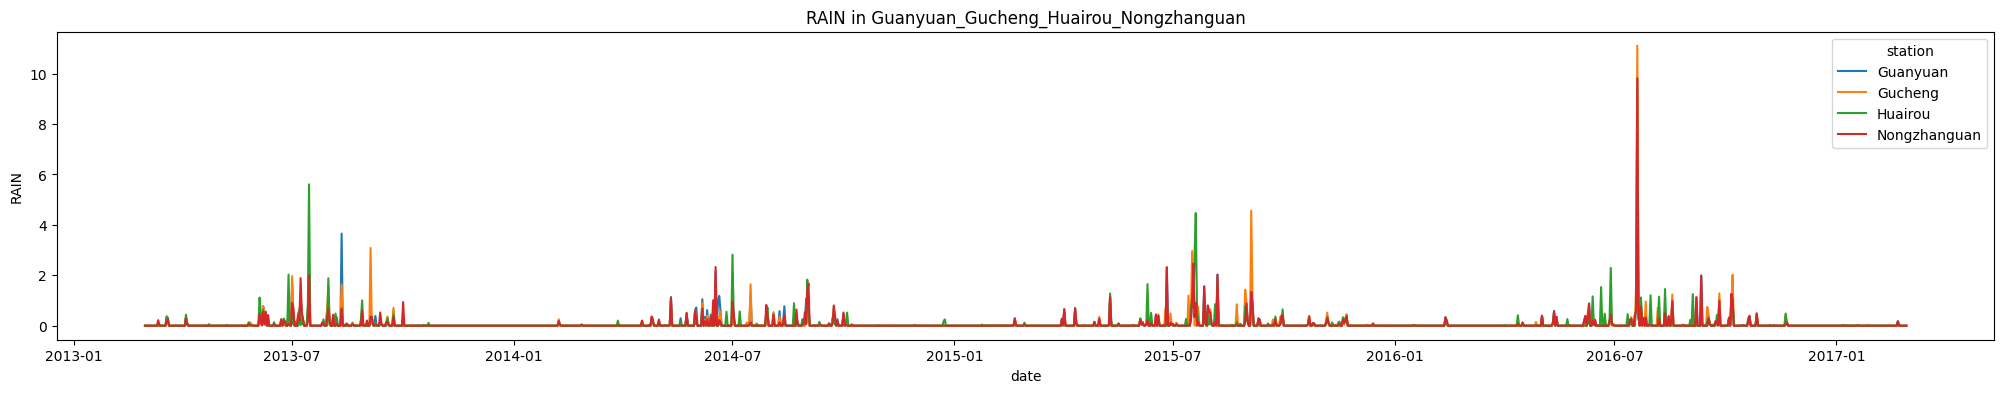

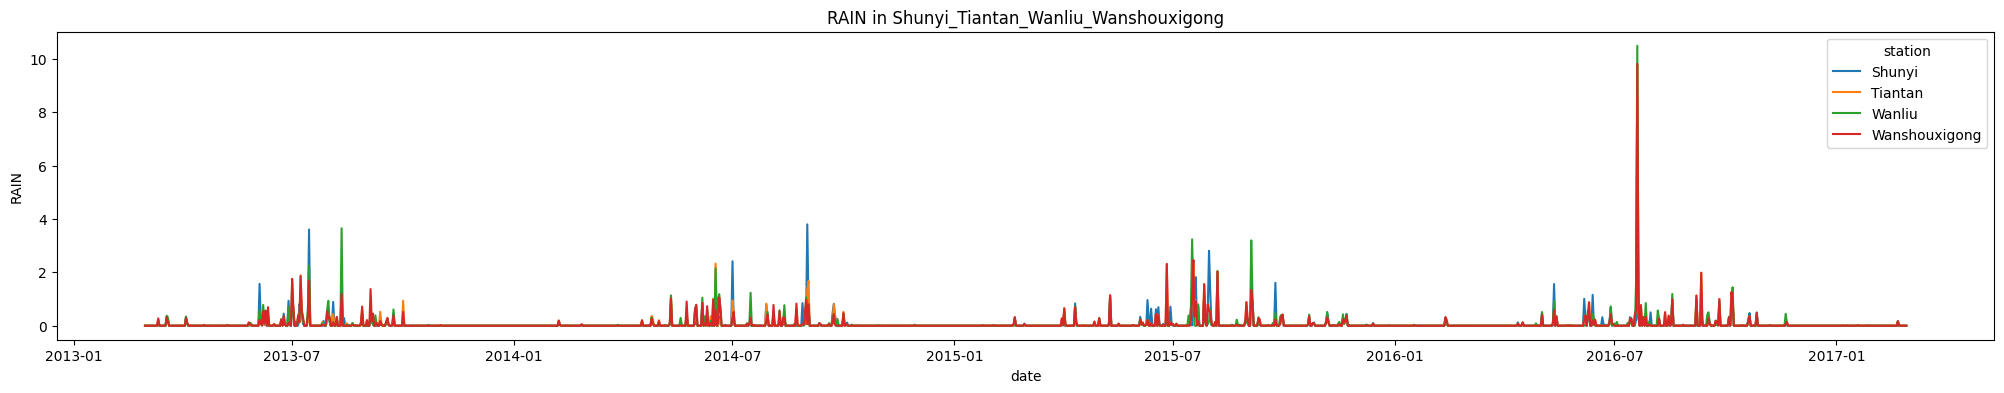

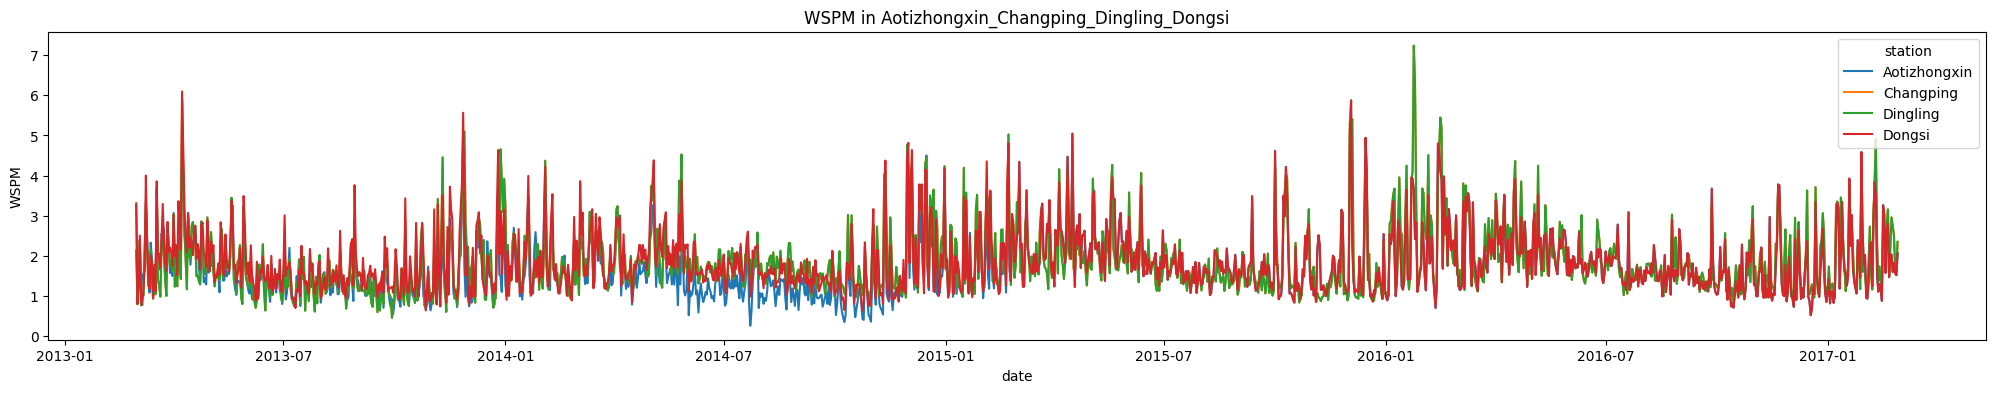

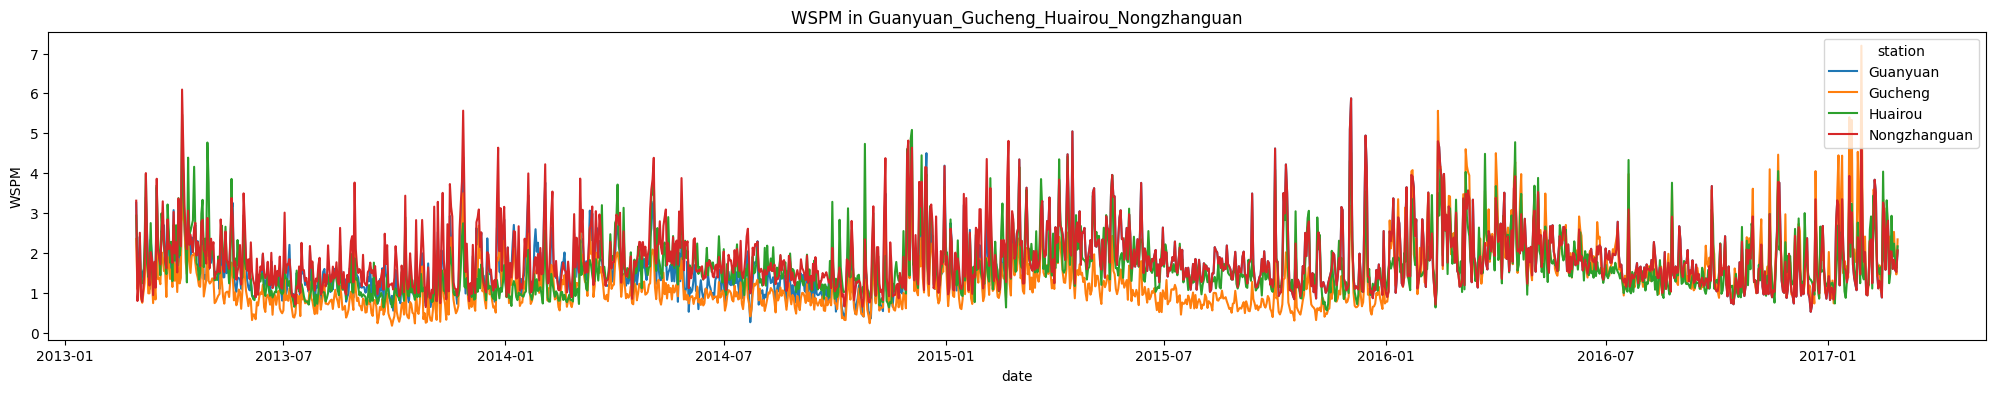

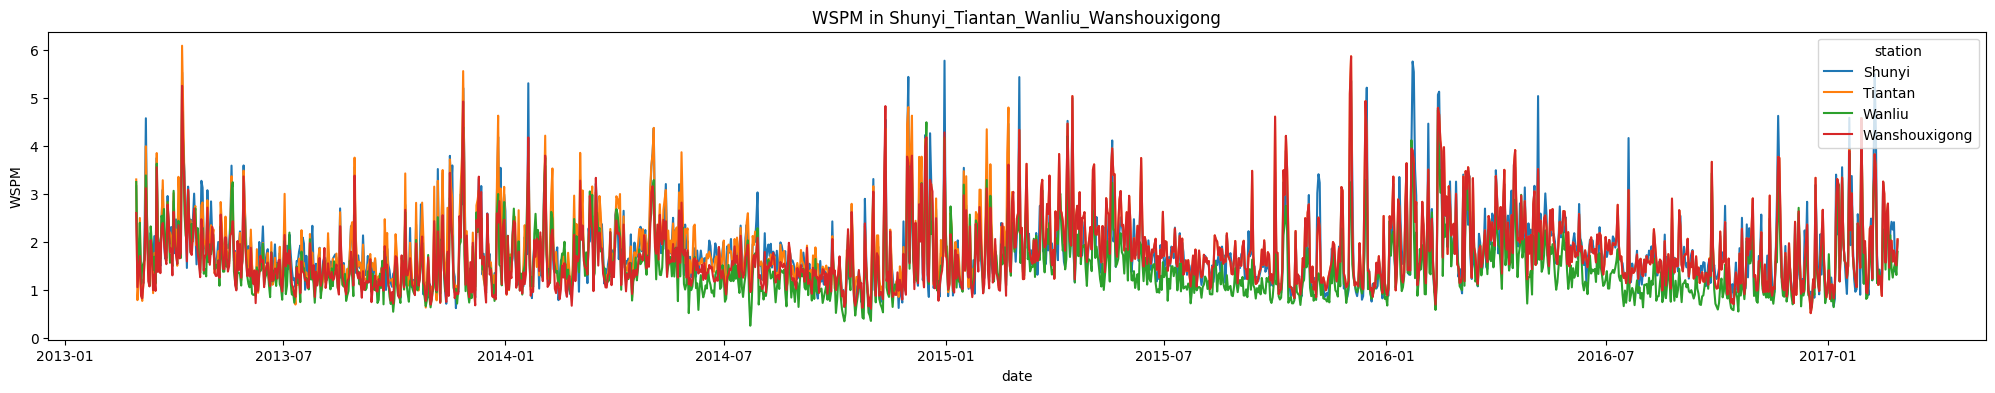

In [ ]:
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for column in columns_to_plot:
    for key in df_merge:
        create_line_plot(df_merge[key], column, f'{column} in {key}')


In [ ]:
season = []
for month in df_grouping['date'].dt.month:
    if 4 <= month <= 6:
        season.append('semi')
    elif 7 <= month <= 8:
        season.append('panas')
    elif 9 <= month <= 10:
        season.append('gugur')
    else:
        season.append('dingin')
df_grouping['musim'] = season

In [ ]:
df_grouping.head()

station     PM2.5       PM10        SO2        NO2          CO  \
0  Aotizhongxin  7.125000  10.750000  11.708333  22.583333  429.166667   
1     Changping  5.083333  18.958333  16.041667  15.333333  387.500000   
2      Dingling  6.375000  12.853310   3.000000  19.265311  204.166667   
3        Dongsi  6.416667   9.875000   8.897129  29.570810  434.586214   
4      Guanyuan  7.541667  11.666667   8.500000  28.500000  400.000000   

          O3      TEMP         PRES       DEWP  RAIN      WSPM       date  \
0  63.875000  1.391667  1026.875000 -18.745833   0.0  3.254167 2013-03-01   
1  77.791667  0.812500  1023.858333 -19.583333   0.0  2.133333 2013-03-01   
2  81.958333  0.812500  1023.858333 -19.583333   0.0  2.133333 2013-03-01   
3  72.133777  1.325000  1028.783333 -21.466667   0.0  3.308333 2013-03-01   
4  63.166667  1.391667  1026.875000 -18.745833   0.0  3.254167 2013-03-01   

    musim  
0  dingin  
1  dingin  
2  dingin  
3  dingin  
4  dingin

### Scatterplot DEWP vs TEMP

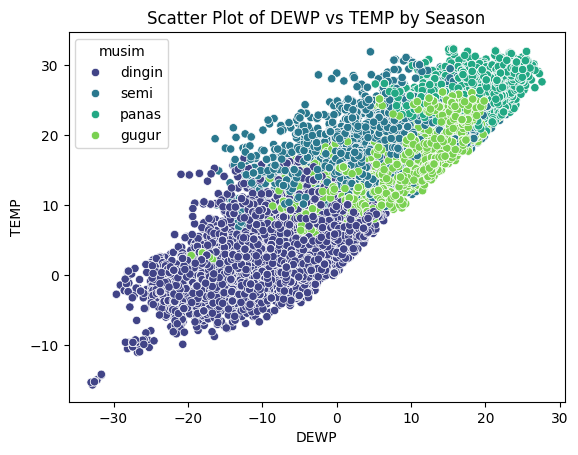

In [ ]:
sns.scatterplot(data=df_grouping, x='DEWP', y='TEMP', hue='musim', palette='viridis')
plt.title('Scatter Plot of DEWP vs TEMP by Season')
plt.show()

### Explanatory Analysis

##### Pertanyaan 1

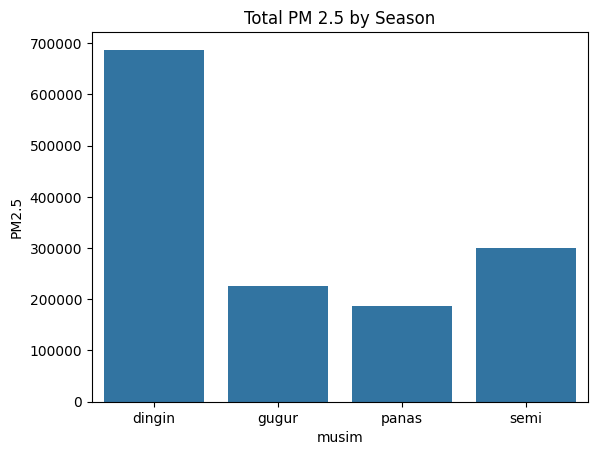

In [ ]:
# Grouping and summing PM2.5 by season
seasonal_pm25 = df_grouping.groupby(by=['musim'])['PM2.5'].sum().reset_index()

# Creating the bar plot
sns.barplot(data=seasonal_pm25, x="musim", y="PM2.5")
plt.title('Total PM 2.5 by Season')
plt.show()

Berdasarkan data yang ada, konsentrasi PM2.5 tertinggi terjadi pada musim dingin, sedangkan yang terendah pada musim panas. Beberapa faktor yang mungkin menyebabkan hal ini antara lain:

1. Pemanasan Rumah Tangga: Di musim dingin, penggunaan pemanas seperti tungku kayu, kompor, atau pemanas listrik meningkat, yang menghasilkan partikel PM2.5.
2. Polusi Udara: Musim dingin sering kali memiliki kondisi cuaca yang stabil, yang memungkinkan polutan menumpuk di udara. Polusi dari kendaraan, industri, dan pembakaran bahan bakar fosil juga berkontribusi pada peningkatan PM2.5.
3. Inversi Termal: Fenomena ini terjadi ketika lapisan udara hangat berada di atas lapisan udara dingin, menjebak polutan di dekat permukaan tanah dan meningkatkan konsentrasi PM2.5.
4. Aktivitas Manusia: Aktivitas dalam ruangan seperti memasak, merokok, dan penggunaan produk kimia rumah tangga meningkat selama musim dingin, menghasilkan lebih banyak partikel PM2.5.
5. Kurangnya Ventilasi: Pada musim dingin, orang cenderung berada di dalam ruangan dengan ventilasi yang kurang baik, menyebabkan penumpukan PM2.5 di udara dalam ruangan.

##### Pertanyaan 2

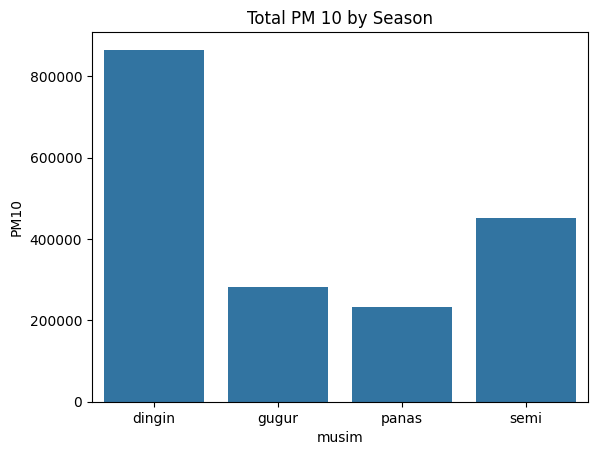

In [ ]:
# Grouping and summing PM 10 by season
seasonal_pm10 = df_grouping.groupby(by=['musim'])['PM10'].sum().reset_index()

# Creating the bar plot
sns.barplot(data=seasonal_pm10, x="musim", y="PM10")
plt.title('Total PM 10 by Season')
plt.show()

Berdasarkan data yang ada, konsentrasi PM10 tertinggi terjadi pada musim dingin, sedangkan yang terendah pada musim panas. Beberapa faktor yang mungkin berkontribusi terhadap fenomena ini meliputi:
1. Aktivitas Konstruksi: Pada musim dingin, aktivitas konstruksi mungkin berkurang, tetapi debu dan partikel dari proyek konstruksi yang tertunda atau tidak selesai dapat tetap berada di udara lebih lama karena kondisi cuaca yang stabil.
2. Pembakaran Sampah: Di beberapa daerah, pembakaran sampah lebih sering terjadi pada musim dingin untuk mengurangi volume sampah. Proses ini menghasilkan partikel PM10 yang dapat terlepas ke atmosfer.
3. Transportasi dan Emisi Kendaraan: Meskipun kendaraan bermotor beroperasi sepanjang tahun, emisi dari kendaraan dapat lebih terperangkap di dekat permukaan tanah selama musim dingin karena inversi termal, meningkatkan konsentrasi PM10.
4. Penggunaan Bahan Bakar Padat: Di beberapa wilayah, penggunaan bahan bakar padat seperti batu bara untuk pemanasan rumah tangga lebih umum pada musim dingin, yang menghasilkan partikel PM10.
5. Kondisi Cuaca Kering: Musim dingin sering kali lebih kering dibandingkan musim lainnya, yang dapat menyebabkan lebih banyak debu dan partikel halus terangkat ke udara, meningkatkan konsentrasi PM10.

## Conclusion

### Soal 1
Konsentrasi PM2.5 tertinggi terjadi pada musim dingin dan terendah pada musim panas. Faktor-faktor yang berkontribusi meliputi peningkatan penggunaan pemanas rumah tangga, kondisi cuaca stabil yang memungkinkan penumpukan polutan, inversi termal yang menjebak polutan di dekat permukaan tanah, peningkatan aktivitas dalam ruangan, dan kurangnya ventilasi selama musim dingin.



### Soal 2
Konsentrasi PM10 tertinggi terjadi pada musim dingin dan terendah pada musim panas. Faktor-faktor yang berkontribusi meliputi debu dari proyek konstruksi yang tertunda, pembakaran sampah yang lebih sering terjadi, emisi kendaraan yang terperangkap karena inversi termal, penggunaan batu bara untuk pemanasan rumah tangga, dan kondisi cuaca yang lebih kering selama musim dingin yang menyebabkan lebih banyak debu terangkat ke udara.